# BANK LOAN DEFAULT

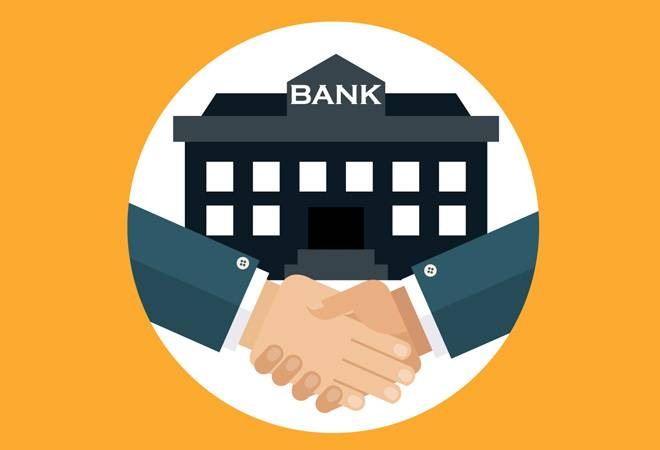

## *Data Description*

**income** : Income of the customer

**age** : Age of the customer

**experience** : Work experience of the customer in years

**profession** : Profession of the customer

**married** : Whether married or single

**house_ownership** : House ownership status of the customer

**car_ownership** : Whether the customer owns a car or not

**risk_flag** : Whether the customer defaulted on the loan or not

**currentjobyears** : Years of experience in the current job of customer

**currenthouseyears** : Number of years in the current residence

**city** : City of residence

**state** : State of residence

## LIBRARIES

In [883]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [884]:
#pip install --upgrade matplotlib

## Merging 2 datasets

In [885]:
test = pd.read_csv("Test Data.csv")
train = pd.read_csv("Training Data.csv")

In [886]:
train.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [887]:
test.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [888]:
test.rename(columns = {"ID" : "Id"}, inplace=True)

In [889]:
bigdata = pd.concat([test, train], ignore_index=True, sort=False)
bigdata.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13,NaN
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10,NaN
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14,NaN
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12,NaN
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11,NaN


# EDA

In [890]:
df = pd.read_csv("Training Data.csv")
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [891]:
df.shape

(252000, 13)

In [892]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [893]:
df.describe().T # For numerical variables

,count,mean,std,min,25%,50%,75%,max
Id,252000.000,126000.500,72746.278,1.000,63000.750,126000.500,189000.250,252000.000
Income,252000.000,4997116.665,2878311.014,10310.000,2503015.000,5000694.500,7477502.000,9999938.000
Age,252000.000,49.954,17.064,21.000,35.000,50.000,65.000,79.000
Experience,252000.000,10.084,6.003,0.000,5.000,10.000,15.000,20.000
CURRENT_JOB_YRS,252000.000,6.334,3.647,0.000,3.000,6.000,9.000,14.000
CURRENT_HOUSE_YRS,252000.000,11.998,1.399,10.000,11.000,12.000,13.000,14.000
Risk_Flag,252000.000,0.123,0.328,0.000,0.000,0.000,0.000,1.000


In [894]:
df.describe(include=['O']).T  # For categorical variables

,count,unique,top,freq
Married/Single,252000,2,single,226272
House_Ownership,252000,3,rented,231898
Car_Ownership,252000,2,no,176000
Profession,252000,51,Physician,5957
CITY,252000,317,Vijayanagaram,1259
STATE,252000,29,Uttar_Pradesh,28400


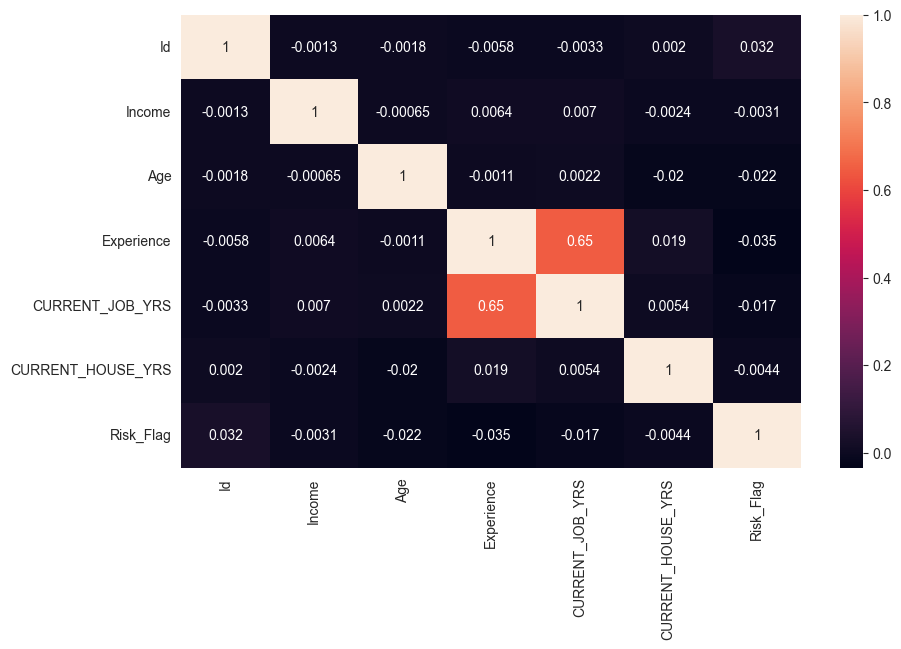

In [895]:
sns.heatmap(df.corr(), annot=True); 

In [896]:
df.duplicated().sum()

0

In [897]:
df2 = df.copy()

## Id

In [898]:
df.drop("Id", axis=1, inplace=True)

## Income

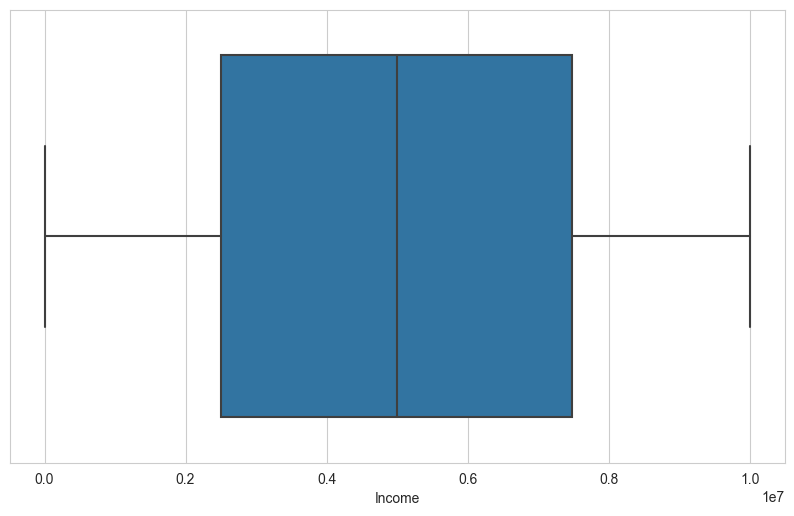

In [899]:
sns.boxplot(df.Income);

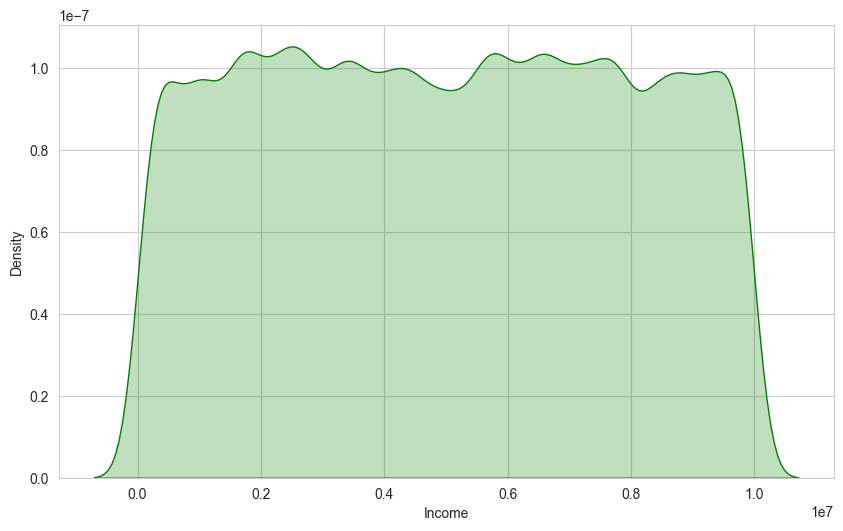

In [900]:
sns.kdeplot(df.Income, color='green',shade=True);

In [901]:
df.groupby("Profession")["Income"].agg(["min", "max", "mean"]).sort_values(by="mean", ascending=False)

,min,max,mean
Profession,,,
Petroleum_Engineer,22921,9968353,5443309.827
Psychologist,33224,9985964,5357795.262
Designer,12841,9996946,5336802.230
Scientist,13792,9975985,5282710.423
Surgeon,18215,9995445,5235358.713
Comedian,13429,9984983,5199538.529
Chemical_engineer,26926,9984718,5189804.995
Mechanical_engineer,37057,9990505,5175032.068
Artist,31297,9976619,5164765.182


## Age

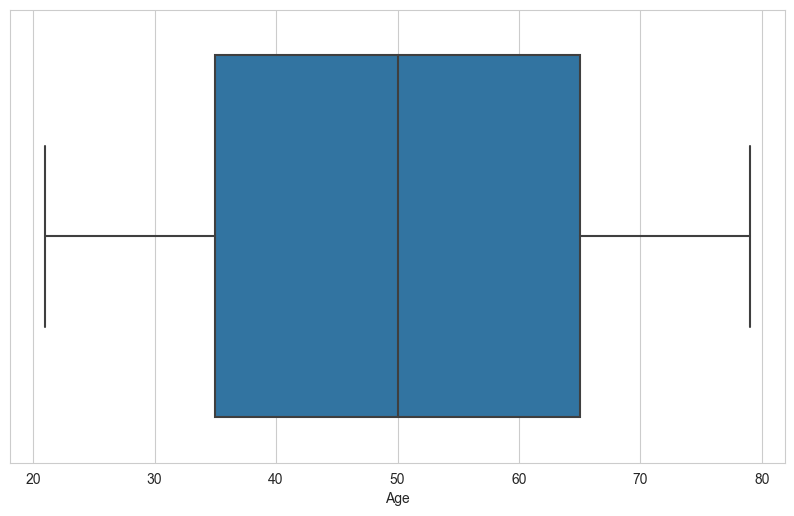

In [902]:
sns.boxplot(df.Age);

## Experience

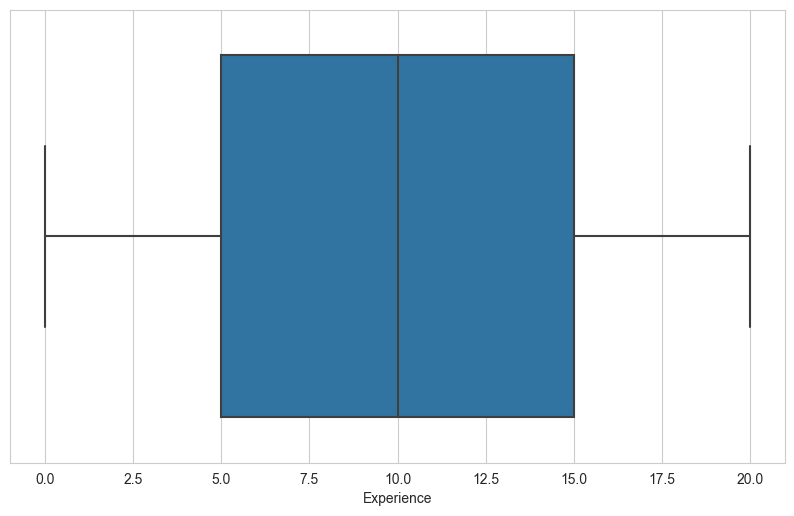

In [903]:
sns.boxplot(df.Experience);

## Married/Single 

In [904]:
df["Married/Single"].value_counts()

single     226272
married     25728
Name: Married/Single, dtype: int64

In [905]:
df.rename(columns={"Married/Single":"Married_Single"}, inplace=True)
df

,Income,Age,Experience,Married_Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


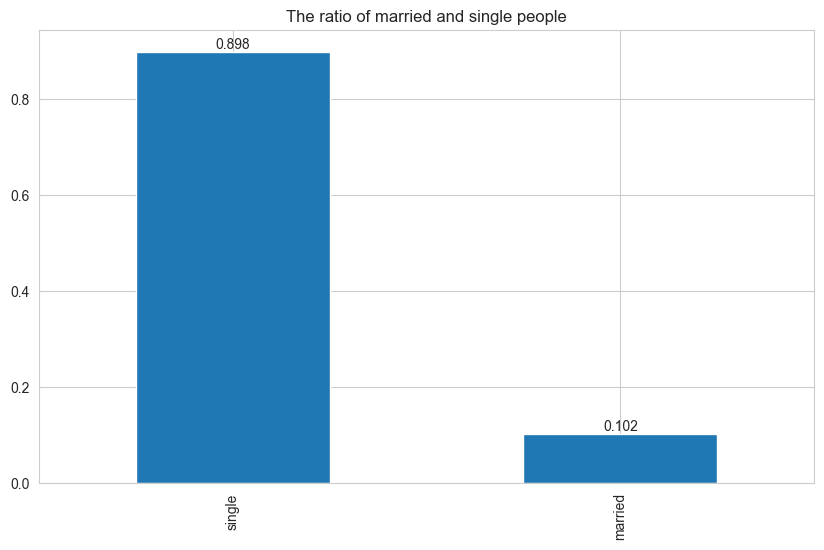

In [906]:
ax = df["Married_Single"].value_counts(normalize=True).plot(kind="bar")
plt.title('The ratio of married and single people')
ax.bar_label(ax.containers[0], fmt="%.3f");

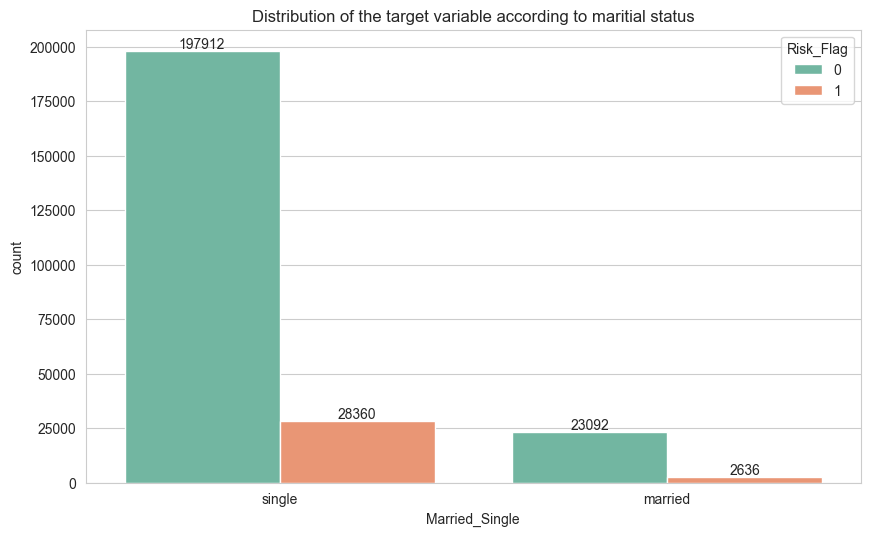

In [907]:
ax = sns.countplot(data = df , x=df["Married_Single"], hue= "Risk_Flag", palette="Set2")
plt.title('Distribution of the target variable according to maritial status')
for p in ax.containers:
    ax.bar_label(p)

In [908]:
df.groupby('Married_Single').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)
# the average risk percentage according to the marital status 

Married_Single
single    12.534
married   10.246
Name: Risk_Flag, dtype: float64

## House_Ownership

In [909]:
df["House_Ownership"].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [910]:
df[df["House_Ownership"] == "norent_noown"]["Profession"].value_counts()

Software_Developer            329
Surveyor                      319
Biomedical_Engineer           248
Scientist                     244
Web_designer                  241
Politician                    209
Comedian                      206
Chemical_engineer             201
Hotel_Manager                 201
Computer_operator             201
Computer_hardware_engineer    190
Army_officer                  190
Financial_Analyst             186
Technician                    168
Microbiologist                167
Surgeon                       166
Fashion_Designer              165
Geologist                     163
Industrial_Engineer           162
Petroleum_Engineer            158
Air_traffic_controller        158
Mechanical_engineer           157
Architect                     143
Physician                     141
Civil_engineer                138
Designer                      138
Chartered_Accountant          132
Statistician                  129
Design_Engineer               129
Civil_servant 

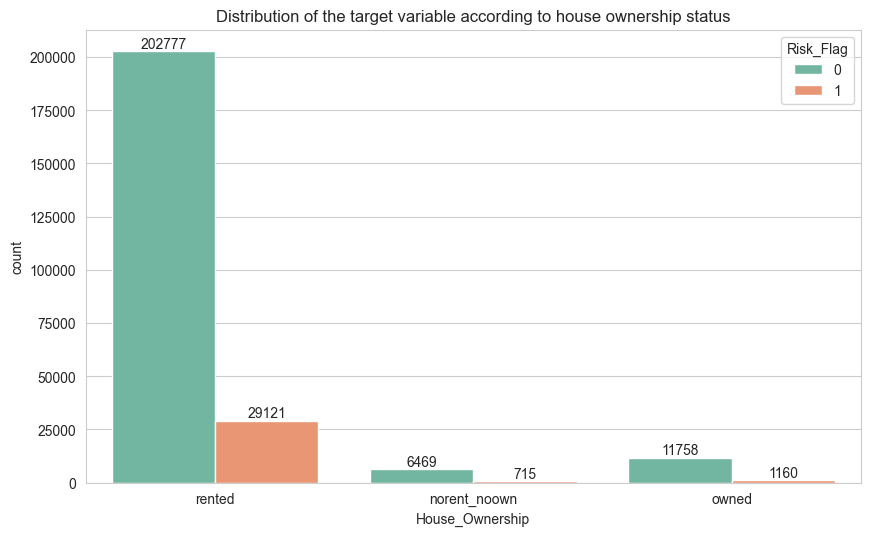

In [911]:
ax = sns.countplot(data = df , x=df["House_Ownership"], hue= "Risk_Flag", palette="Set2")
plt.title('Distribution of the target variable according to house ownership status')
for p in ax.containers:
    ax.bar_label(p)

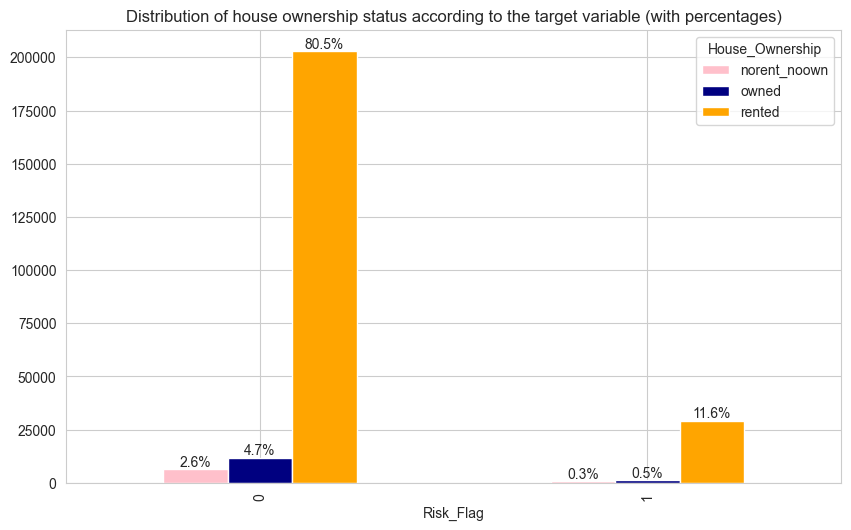

In [912]:
ax = pd.crosstab(df["Risk_Flag"], df["House_Ownership"]).plot(kind= "bar", color = ["pink","navy","orange"])
plt.title('Distribution of house ownership status according to the target variable (with percentages)')
for c in ax.containers:
    labels = [f'{h/df.House_Ownership.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [913]:
df_new = pd.crosstab([df.CURRENT_JOB_YRS], df.House_Ownership)
df_new

House_Ownership,norent_noown,owned,rented
CURRENT_JOB_YRS,,,
0,489,386,10168
1,155,394,11026
2,425,619,10043
3,563,2081,26816
4,774,1716,25849
5,925,1022,23144
6,715,1152,21624
7,491,673,18761
8,449,837,17588


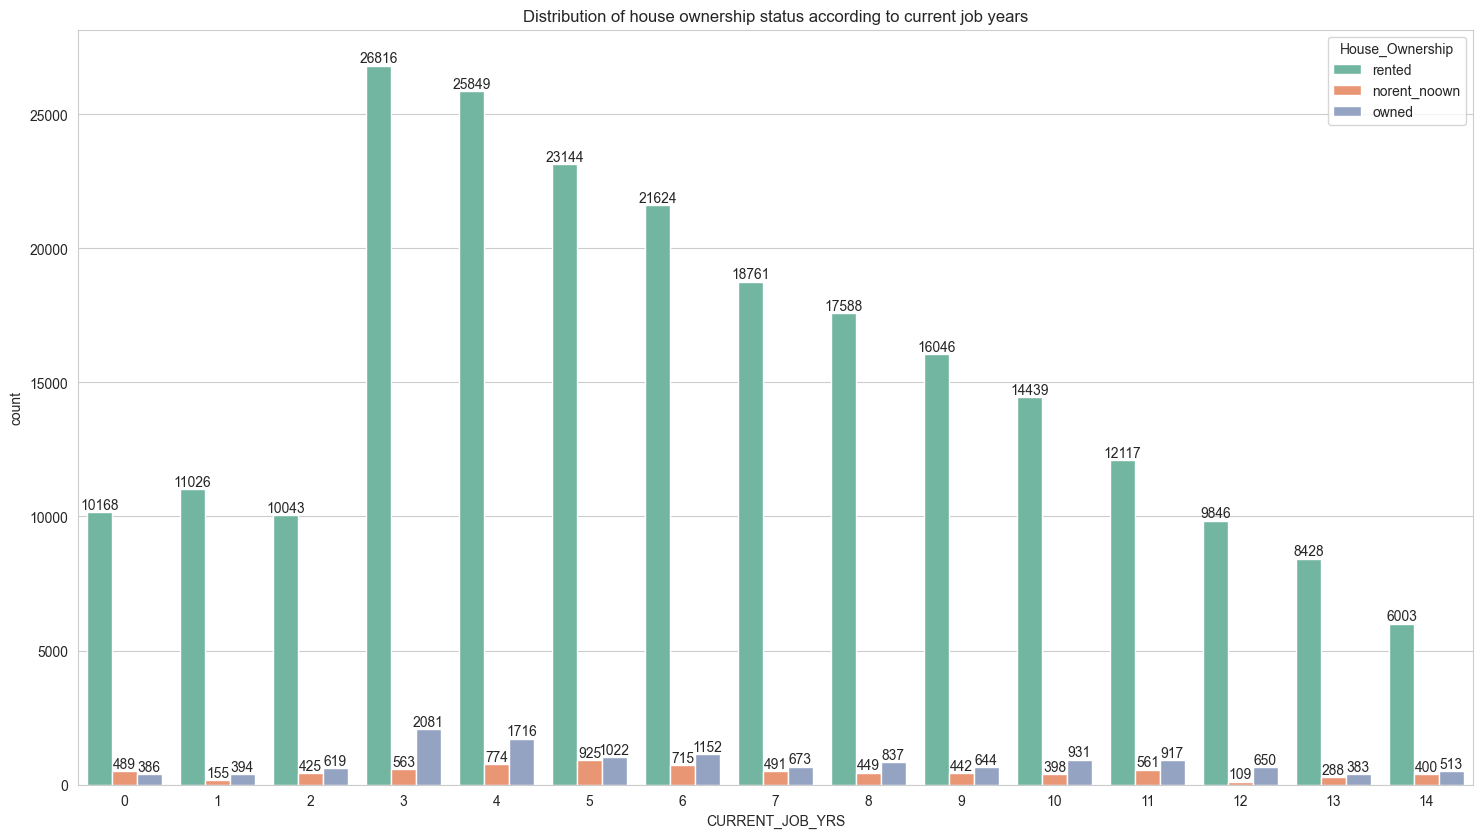

In [914]:
plt.figure(figsize=(18,10))
ax = sns.countplot(data = df , x=df["CURRENT_JOB_YRS"], hue= "House_Ownership", palette="Set2")
plt.title('Distribution of house ownership status according to current job years')
for p in ax.containers:
    ax.bar_label(p)

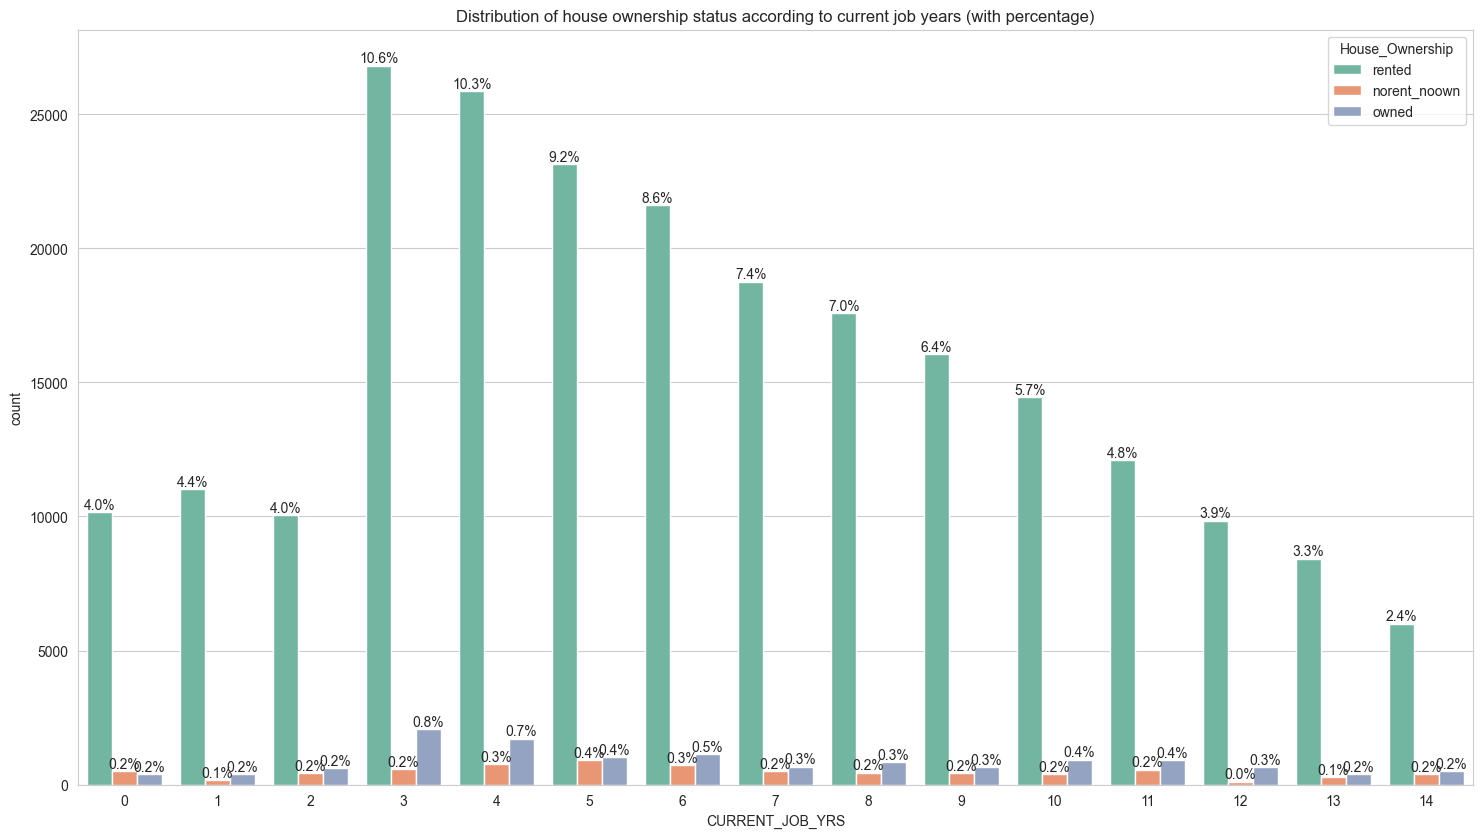

In [915]:
plt.figure(figsize=(18,10))
ax = sns.countplot(data = df , x=df["CURRENT_JOB_YRS"], hue= "House_Ownership", palette="Set2")
plt.title('Distribution of house ownership status according to current job years (with percentage)')
for c in ax.containers:
    labels = [f'{h/df.House_Ownership.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

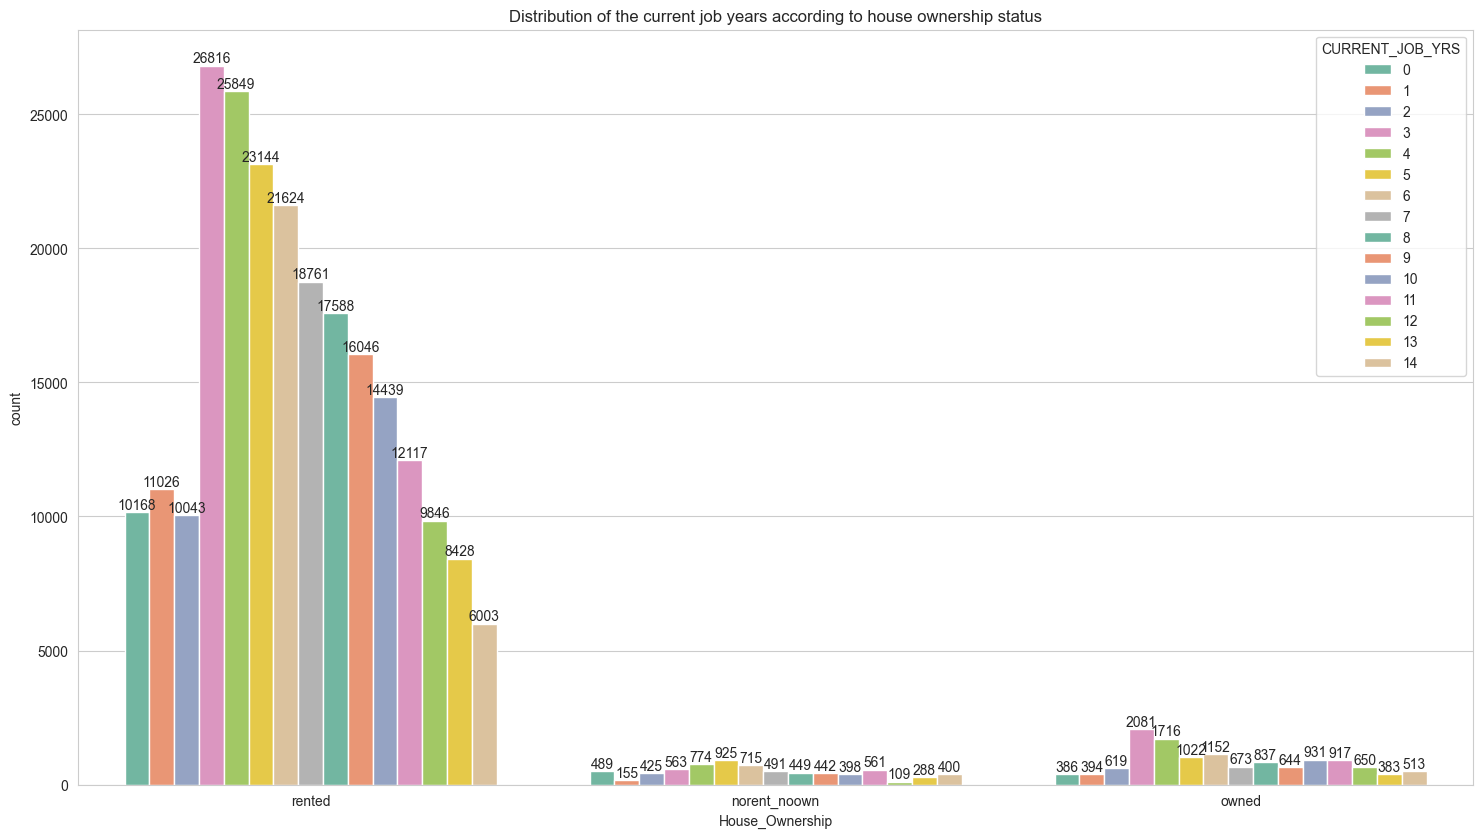

In [916]:
plt.figure(figsize=(18,10))
ax = sns.countplot(data = df , x=df["House_Ownership"], hue= "CURRENT_JOB_YRS", palette="Set2")
plt.title('Distribution of the current job years according to house ownership status')
for bars in ax.containers:
        ax.bar_label(bars);

In [917]:
df.groupby('House_Ownership').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)
# the average risk percentage according to the house ownership status 

House_Ownership
rented         12.558
norent_noown    9.953
owned           8.980
Name: Risk_Flag, dtype: float64

## Car_Ownership

In [918]:
df["Car_Ownership"].value_counts()

no     176000
yes     76000
Name: Car_Ownership, dtype: int64

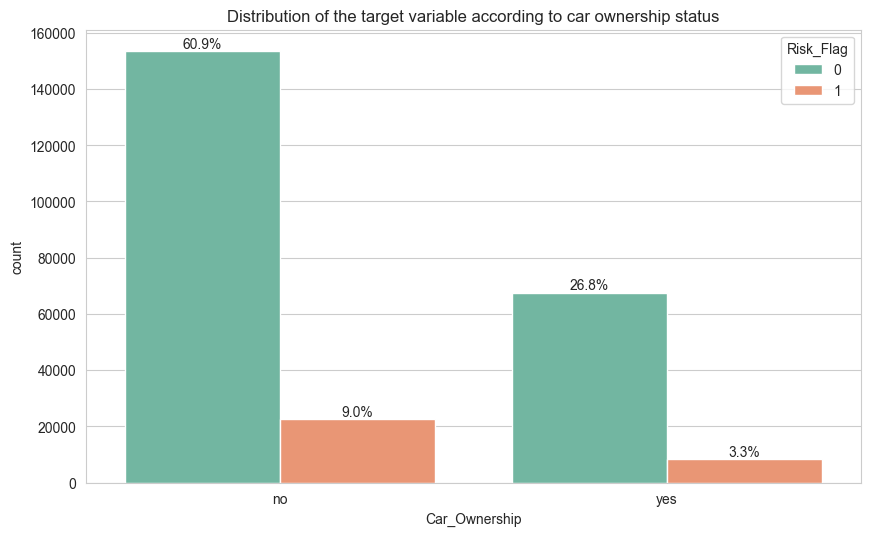

In [919]:
ax = sns.countplot(data = df , x=df["Car_Ownership"], hue= "Risk_Flag", palette="Set2")
plt.title('Distribution of the target variable according to car ownership status')
for c in ax.containers:
    labels = [f'{h/df.Car_Ownership.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [920]:
df.groupby('Car_Ownership').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)
# the average risk percentage according to the car ownership status 

Car_Ownership
no    12.819
yes   11.099
Name: Risk_Flag, dtype: float64

## Profession

In [921]:
df["Profession"].value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

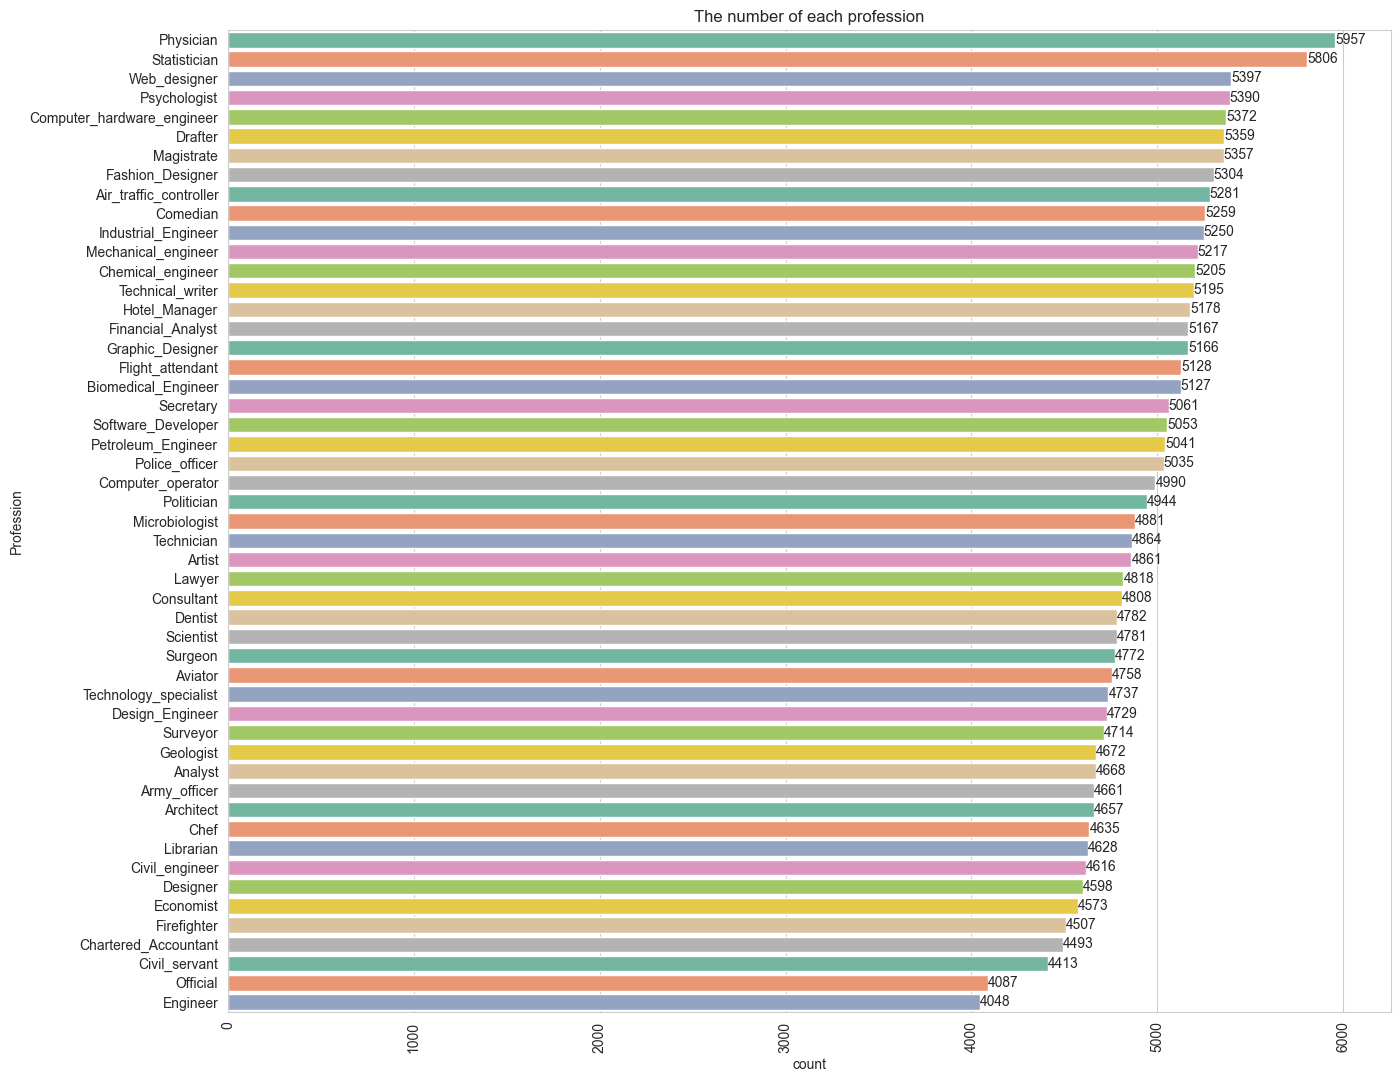

In [922]:
plt.figure(figsize=(15,13))
ax = sns.countplot(data = df , y=df["Profession"].sort_values(), order = df['Profession'].value_counts().index, palette="Set2")
plt.xticks(rotation=90)
plt.title('The number of each profession')
for bars in ax.containers:
        ax.bar_label(bars);

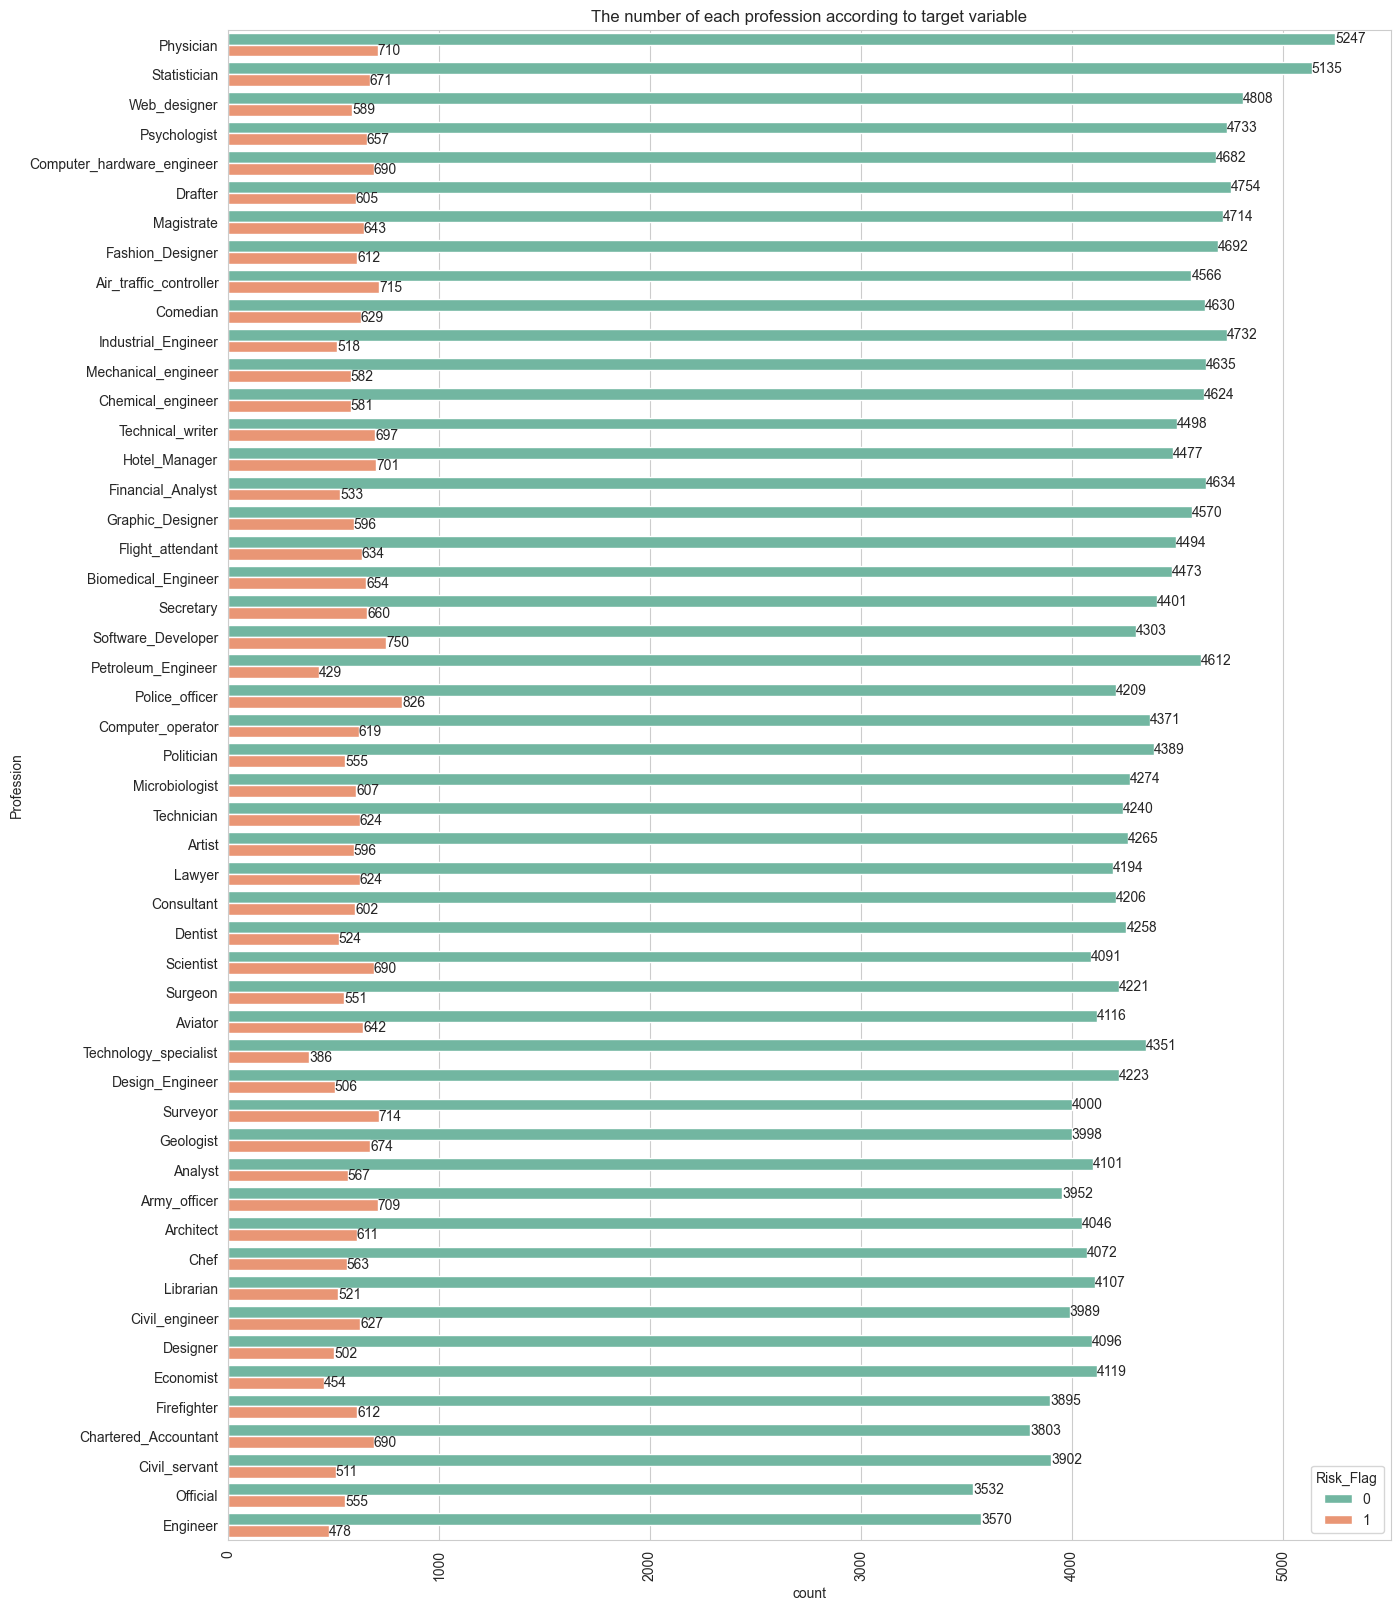

In [923]:
plt.figure(figsize=(15,20))
ax = sns.countplot(data = df , y=df["Profession"].sort_values(), hue  = "Risk_Flag",order = df['Profession'].value_counts().index, palette="Set2")
plt.xticks(rotation=90)
plt.title('The number of each profession according to target variable')
for bars in ax.containers:
        ax.bar_label(bars);

In [924]:
df.groupby('Profession').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)
# the average risk percentage of each profession 

Profession
Police_officer               16.405
Chartered_Accountant         15.357
Army_officer                 15.211
Surveyor                     15.146
Software_Developer           14.843
Scientist                    14.432
Geologist                    14.426
Civil_engineer               13.583
Official                     13.580
Firefighter                  13.579
Air_traffic_controller       13.539
Hotel_Manager                13.538
Aviator                      13.493
Technical_writer             13.417
Architect                    13.120
Secretary                    13.041
Lawyer                       12.951
Computer_hardware_engineer   12.844
Technician                   12.829
Biomedical_Engineer          12.756
Consultant                   12.521
Microbiologist               12.436
Computer_operator            12.405
Flight_attendant             12.363
Artist                       12.261
Psychologist                 12.189
Chef                         12.147
Analyst          

## CITY

In [925]:
df["CITY"].value_counts()

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [926]:
df.groupby('CITY').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)

CITY
Bhubaneswar        32.619
Gwalior            27.273
Bettiah[33]        26.696
Kochi              25.286
Raiganj            23.955
                    ...  
Bangalore           3.714
Bijapur             3.497
Sultan_Pur_Majra    3.409
Dehradun            2.635
Gandhinagar         2.611
Name: Risk_Flag, Length: 317, dtype: float64

In [927]:
df.groupby('CITY').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False).head(40)
# the average risk percentage of each city (first 40)

CITY
Bhubaneswar          32.619
Gwalior              27.273
Bettiah[33]          26.696
Kochi                25.286
Raiganj              23.955
Purnia[26]           23.887
Barasat              23.870
Sikar                23.845
Buxar[37]            23.147
Satna                22.568
Kottayam             22.537
Kavali               22.506
Mysore[7][8][9]      22.057
Bardhaman            21.916
Gandhidham           21.647
Imphal               21.555
Ghaziabad            20.873
Ramagundam[27]       20.845
Muzaffarnagar        20.808
Ahmedabad            20.493
Munger               20.465
Mathura              20.334
Thiruvananthapuram   20.333
Hazaribagh           20.209
Guntur[13]           19.875
Mango                19.685
Udaipur              19.307
Ratlam               19.196
Moradabad            19.176
Shahjahanpur         19.135
Sri_Ganganagar       19.094
Srinagar             19.014
Indore               18.761
Davanagere           18.465
North_Dumdum         18.359
Tinsukia       

In [928]:
df.groupby(['STATE', "CITY"]).Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)

STATE           CITY            
Odisha          Bhubaneswar        32.619
Madhya_Pradesh  Gwalior            27.273
Bihar           Bettiah[33]        26.696
Kerala          Kochi              25.286
West_Bengal     Raiganj            23.955
                                    ...  
Karnataka       Bangalore           3.714
                Bijapur             3.497
Delhi           Sultan_Pur_Majra    3.409
Uttarakhand     Dehradun            2.635
Gujarat         Gandhinagar         2.611
Name: Risk_Flag, Length: 317, dtype: float64

## STATE

In [929]:
df["STATE"].value_counts()

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64

In [930]:
df["STATE"] = df["STATE"].apply(lambda x: "Uttar_Pradesh" if x == "Uttar_Pradesh[5]" else x)

In [931]:
df["STATE"].value_counts()

Uttar_Pradesh        29143
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Manipur                849
Mizoram                849
Himachal_Pradesh       833
Tripura                809
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64

In [932]:
df.groupby('STATE').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)
# the average risk percentage of each state

STATE
Manipur             21.555
Tripura             16.811
Kerala              16.710
Jammu_and_Kashmir   15.899
Madhya_Pradesh      15.437
Odisha              14.255
Rajasthan           14.083
Jharkhand           13.330
Chhattisgarh        13.328
Himachal_Pradesh    13.325
Assam               13.169
Bihar               13.059
Telangana           13.012
West_Bengal         12.814
Haryana             12.421
Uttar_Pradesh       11.804
Gujarat             11.772
Puducherry          11.654
Andhra_Pradesh      11.602
Maharashtra         11.325
Mizoram             11.072
Delhi               10.455
Tamil_Nadu          10.316
Karnataka           10.030
Chandigarh           9.299
Punjab               9.004
Uttarakhand          7.097
Sikkim               4.605
Name: Risk_Flag, dtype: float64

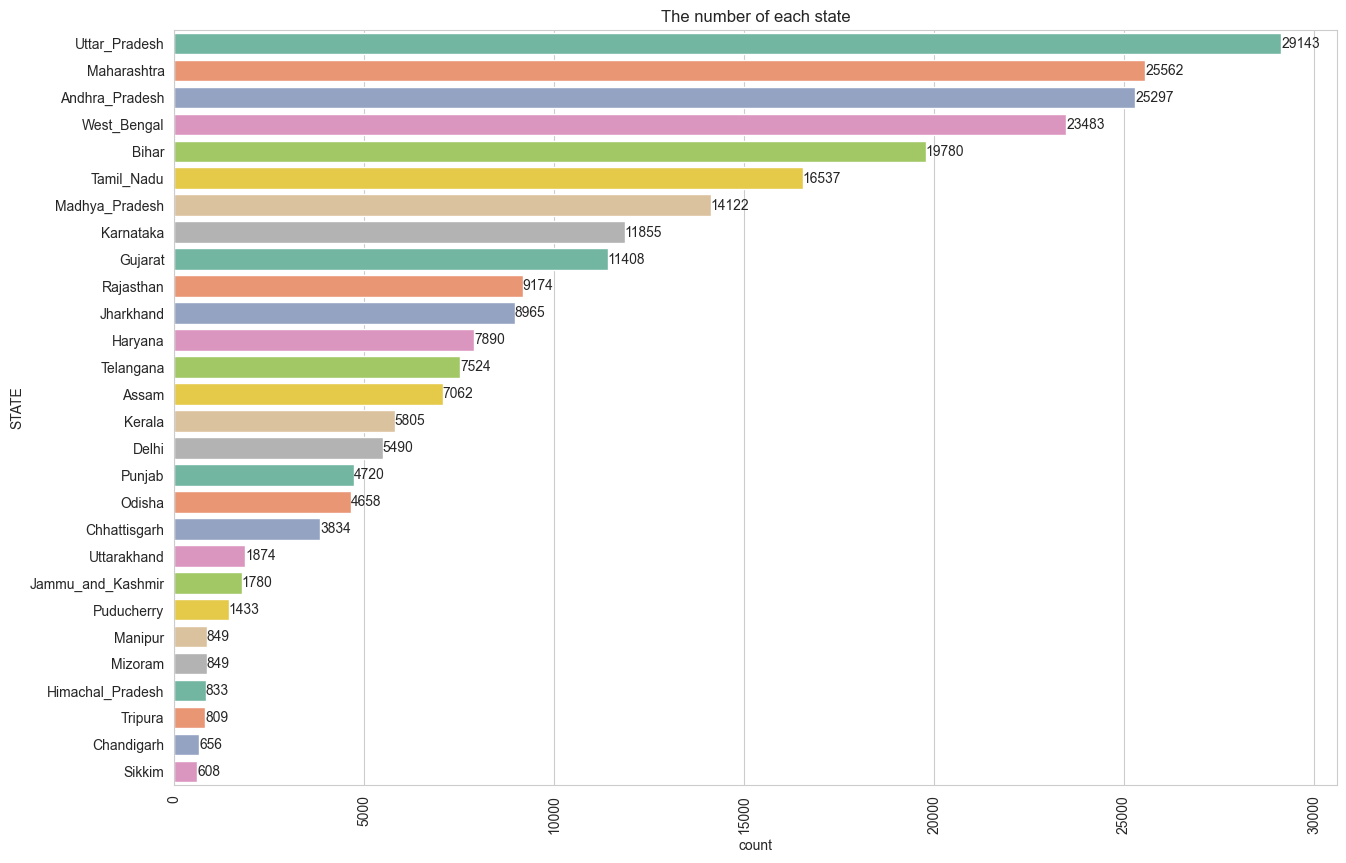

In [933]:
plt.figure(figsize=(15,10))
ax = sns.countplot(data = df , y=df["STATE"].sort_values(), order = df['STATE'].value_counts().index, palette="Set2")
plt.xticks(rotation=90)
plt.title('The number of each state')
for bars in ax.containers:
        ax.bar_label(bars);

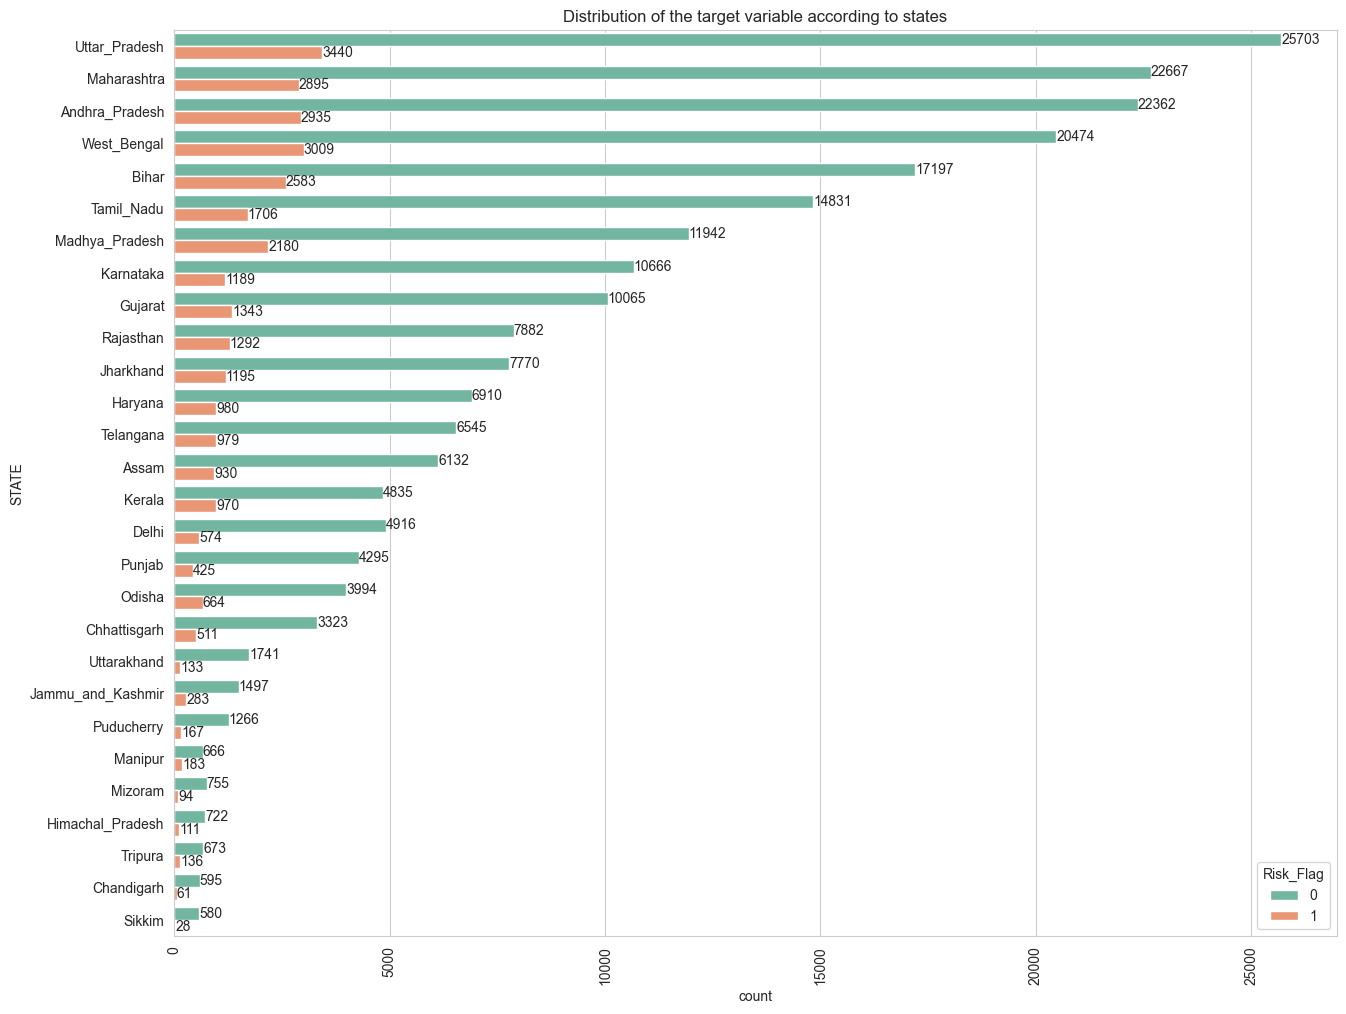

In [934]:
plt.figure(figsize=(15,12))
ax = sns.countplot(data = df , y=df["STATE"].sort_values(), hue= "Risk_Flag", order=df['STATE'].value_counts().index, palette="Set2")
plt.xticks(rotation=90)
plt.title('Distribution of the target variable according to states')
for bars in ax.containers:
        ax.bar_label(bars);

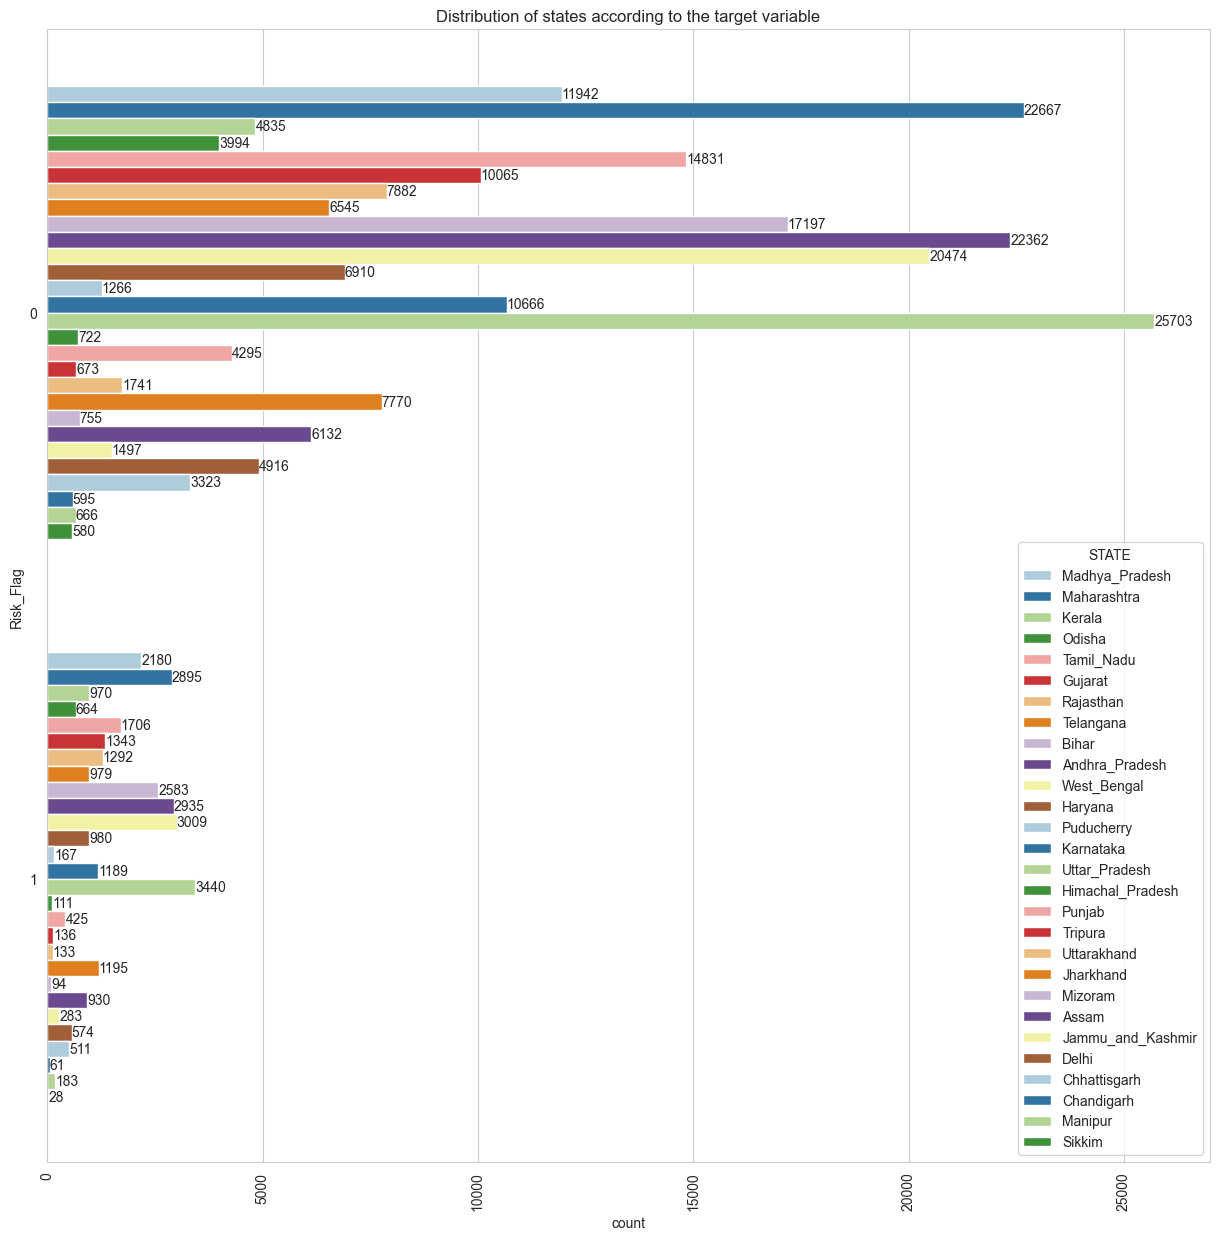

In [935]:
plt.figure(figsize=(15,15))
#order = df.groupby(["Risk_Flag"])["STATE"].value_counts(ascending=False)[1].index
ax = sns.countplot(data = df , y= df["Risk_Flag"] , hue= "STATE", order=df['Risk_Flag'].value_counts().index,  palette="Paired")
plt.xticks(rotation=90)
plt.title('Distribution of states according to the target variable')
for bars in ax.containers:
        ax.bar_label(bars);

## CURRENT_JOB_YRS

In [936]:
df["CURRENT_JOB_YRS"].value_counts()

3     29460
4     28339
5     25091
6     23491
7     19925
8     18874
9     17132
10    15768
11    13595
1     11575
2     11087
0     11043
12    10605
13     9099
14     6916
Name: CURRENT_JOB_YRS, dtype: int64

In [937]:
def w_avg(df, values, weights):
    d = df[values]
    w = df[weights]
    return (d * w).sum() / w.sum()

In [938]:
df.groupby('Profession').apply(w_avg, 'Income', 'CURRENT_JOB_YRS').sort_values(ascending=False)
# Weighted Income Average for each profession

Profession
Petroleum_Engineer           5508109.287
Psychologist                 5440428.819
Surgeon                      5365625.860
Microbiologist               5344514.648
Comedian                     5293911.780
Scientist                    5291150.962
Lawyer                       5278696.646
Computer_hardware_engineer   5244332.827
Chemical_engineer            5210107.174
Designer                     5208062.154
Computer_operator            5191735.123
Architect                    5174225.737
Fashion_Designer             5152452.403
Secretary                    5126591.544
Technology_specialist        5067384.184
Mechanical_engineer          5065628.416
Aviator                      5056202.979
Dentist                      5053367.306
Surveyor                     5048040.976
Air_traffic_controller       5046410.805
Financial_Analyst            5031985.191
Army_officer                 5021898.951
Politician                   5017204.401
Consultant                   5014299.932
Stati

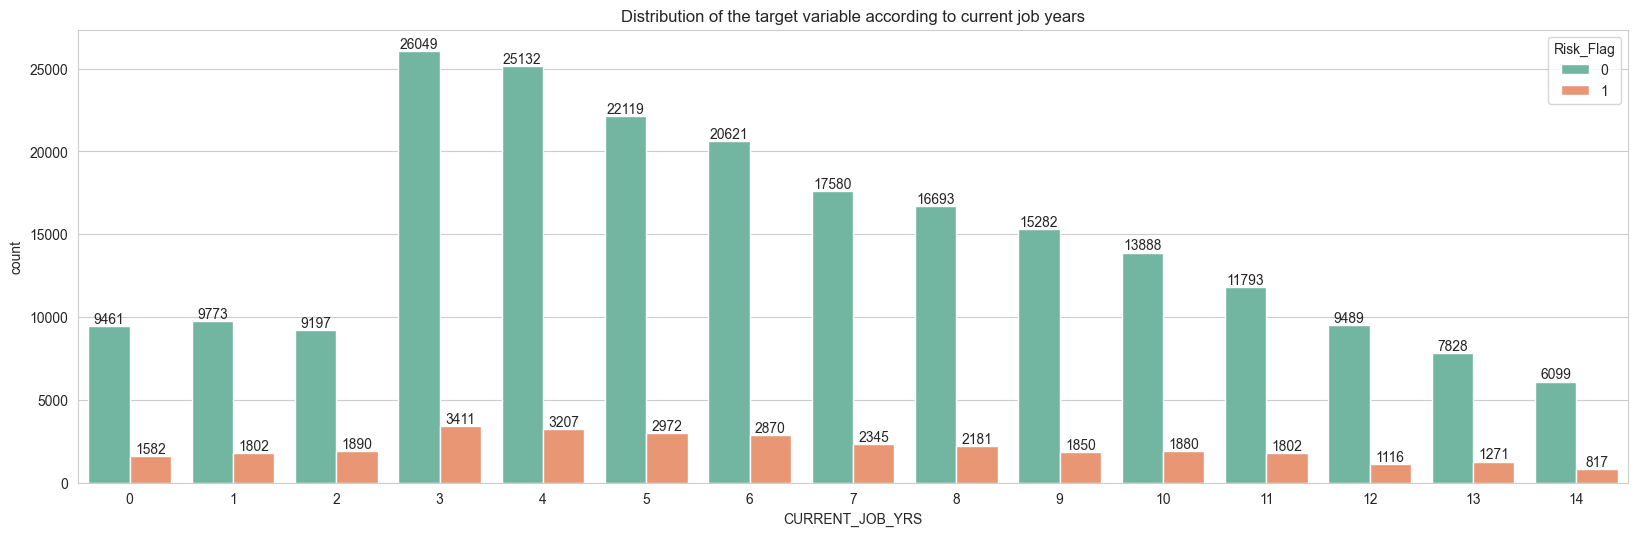

In [939]:
plt.figure(figsize=(20,6))
ax = sns.countplot(data = df , x=df["CURRENT_JOB_YRS"].sort_values(), hue= "Risk_Flag", palette="Set2")
plt.title('Distribution of the target variable according to current job years')
for bars in ax.containers:
        ax.bar_label(bars);

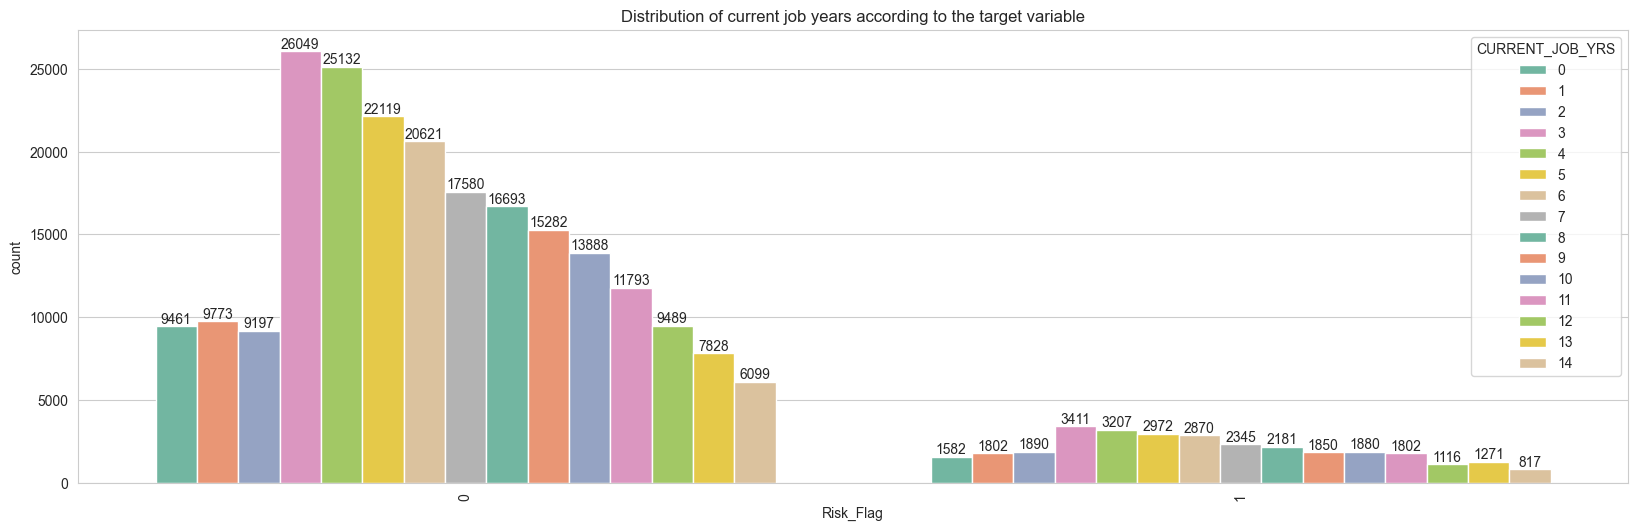

In [940]:
plt.figure(figsize=(20,6))
ax = sns.countplot(data = df, x=df["Risk_Flag"], hue= df["CURRENT_JOB_YRS"].sort_values(), palette="Set2")
plt.xticks(rotation=90)
plt.title('Distribution of current job years according to the target variable')
for bars in ax.containers:
        ax.bar_label(bars);

In [941]:
df.groupby('CURRENT_JOB_YRS').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)
# the average risk percentage according to the current job years

CURRENT_JOB_YRS
2    17.047
1    15.568
0    14.326
13   13.969
11   13.255
6    12.217
10   11.923
5    11.845
14   11.813
7    11.769
3    11.578
8    11.556
4    11.317
9    10.799
12   10.523
Name: Risk_Flag, dtype: float64

## Risk_Flag

In [942]:
df["Risk_Flag"].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

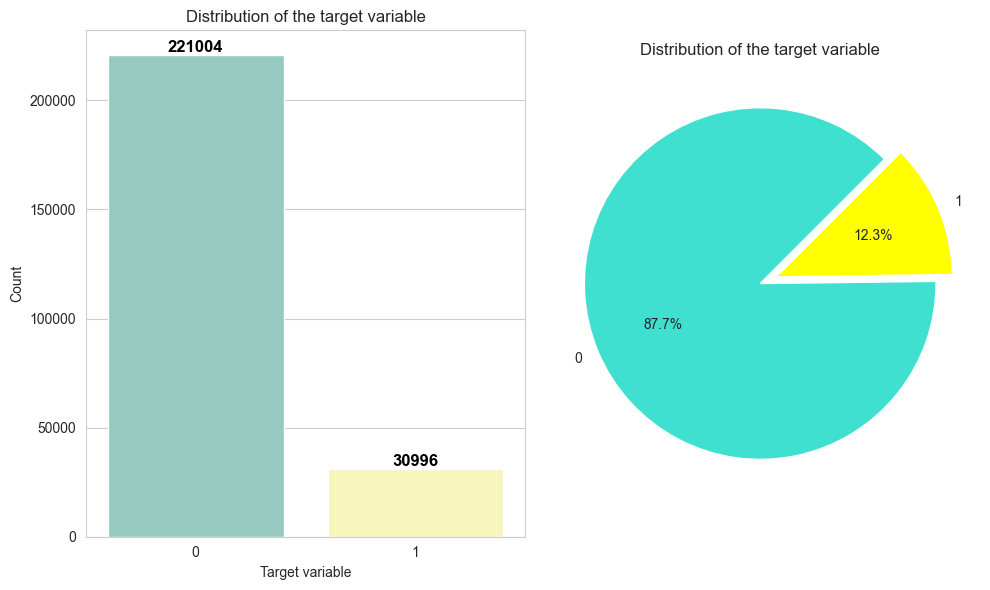

In [943]:
plt.subplot(1,2,1)
ax = sns.countplot(x='Risk_Flag', data=df, palette="Set3")
plt.title('Distribution of the target variable')
plt.xlabel('Target variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.subplot(1,2,2)
plt.pie(df.Risk_Flag.value_counts(), labels = df.Risk_Flag.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode = (0, 0.1), colors = ['turquoise', 'yellow'] )
plt.title('Distribution of the target variable')
plt.tight_layout()
plt.show()

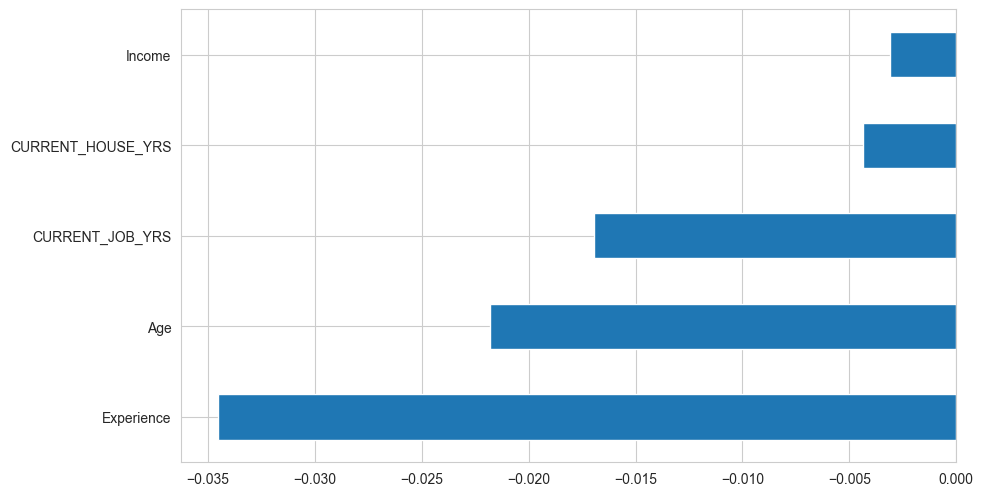

In [944]:
df.corr()['Risk_Flag'].sort_values().drop('Risk_Flag').plot(kind = 'barh');

## Subplots of Features

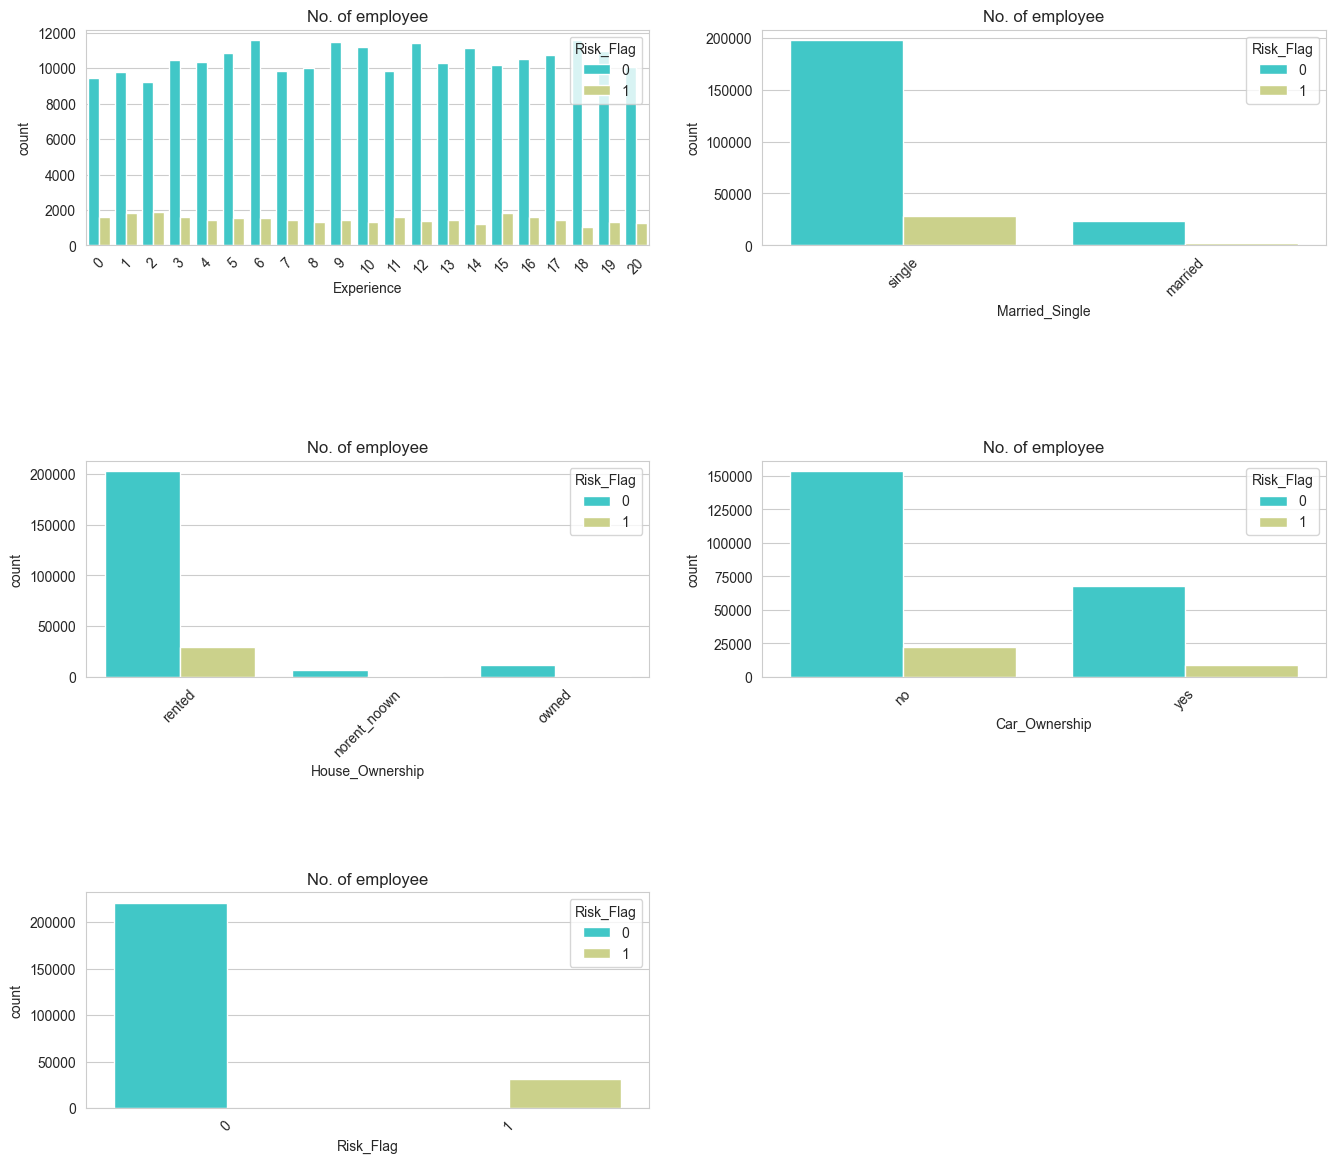

In [945]:
features=["Experience",	"Married_Single",	"House_Ownership",	"Car_Ownership", "Risk_Flag"]
fig=plt.subplots(figsize=(16,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df,hue='Risk_Flag',palette = 'rainbow')
    plt.xticks(rotation=45)
    plt.title("No. of employee")

# MODELLING STAGE

In [946]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [947]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Logistic Regression

In [948]:
dummy_df = df.drop(["CITY", "STATE"], axis=1)

In [949]:
dummy_df = pd.get_dummies(dummy_df, drop_first=True)

In [950]:
dummy_df

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married_Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_Analyst,Profession_Architect,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical_Engineer,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical_engineer,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion_Designer,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic_Designer,Profession_Hotel_Manager,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer
0,1303834,23,3,3,13,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,9,13,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3991815,66,4,4,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,6256451,41,2,2,12,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5768871,47,11,3,14,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,6,11,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
251996,2843572,26,10,6,11,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
251997,4522448,46,7,7,12,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
251998,6507128,45,0,0,10,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [951]:
from sklearn.linear_model import LogisticRegression

In [952]:
X= dummy_df.drop(["Risk_Flag"], axis=1)
y= dummy_df["Risk_Flag"]

In [953]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [954]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [955]:
log_model=LogisticRegression(class_weight = "balanced")
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

In [956]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[22792 21409]
 [ 2668  3531]]
              precision    recall  f1-score   support

           0       0.90      0.52      0.65     44201
           1       0.14      0.57      0.23      6199

    accuracy                           0.52     50400
   macro avg       0.52      0.54      0.44     50400
weighted avg       0.80      0.52      0.60     50400


Train_Set
[[91708 85095]
 [10589 14208]]
              precision    recall  f1-score   support

           0       0.90      0.52      0.66    176803
           1       0.14      0.57      0.23     24797

    accuracy                           0.53    201600
   macro avg       0.52      0.55      0.44    201600
weighted avg       0.80      0.53      0.60    201600



In [957]:
log_model=LogisticRegression(class_weight = "balanced", C=1, penalty="l1", solver="liblinear") 
log_model.fit(X_train_scaled, y_train)

LogisticRegression(C=1, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [958]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[22796 21405]
 [ 2668  3531]]
              precision    recall  f1-score   support

           0       0.90      0.52      0.65     44201
           1       0.14      0.57      0.23      6199

    accuracy                           0.52     50400
   macro avg       0.52      0.54      0.44     50400
weighted avg       0.80      0.52      0.60     50400


Train_Set
[[91674 85129]
 [10605 14192]]
              precision    recall  f1-score   support

           0       0.90      0.52      0.66    176803
           1       0.14      0.57      0.23     24797

    accuracy                           0.53    201600
   macro avg       0.52      0.55      0.44    201600
weighted avg       0.80      0.53      0.60    201600



[Text(0.5, 45.722222222222214, 'Predicted Class'),
 Text(95.72222222222221, 0.5, 'Actual Class')]

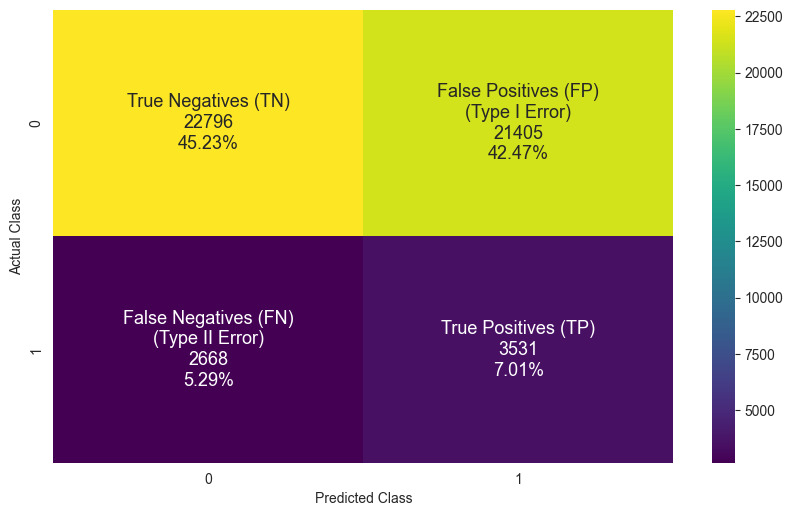

In [959]:
plt.figure(figsize=(10,6))

y_pred = log_model.predict(X_test_scaled)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class')

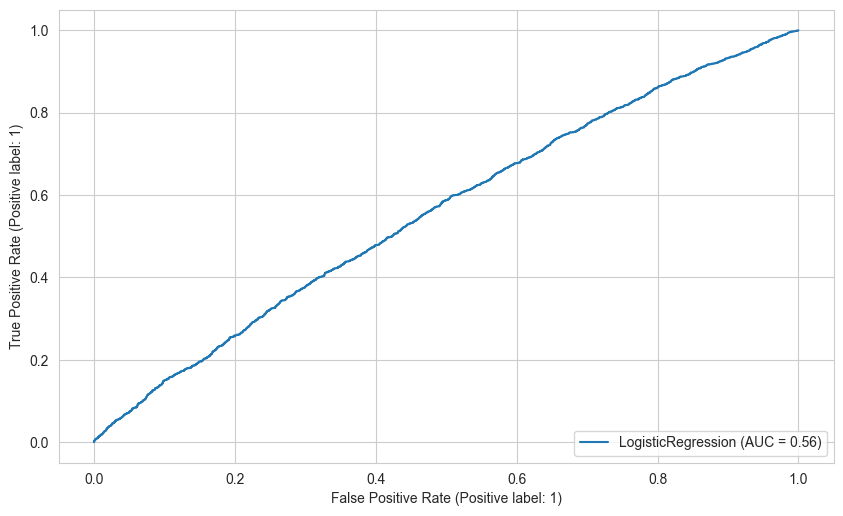

In [960]:
plot_roc_curve(log_model, X_test_scaled, y_test);

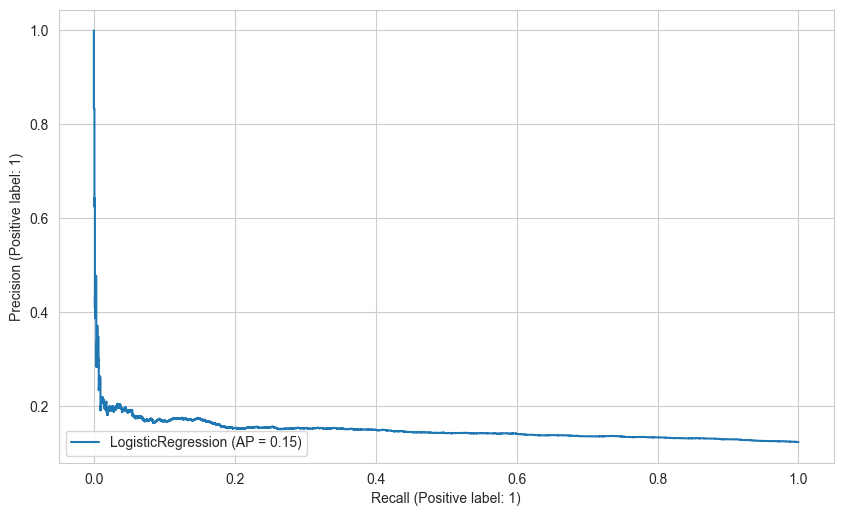

In [961]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

# Random Forest

In [962]:
from sklearn.preprocessing import LabelEncoder

In [963]:
features = ["Married_Single","House_Ownership","Car_Ownership","Profession","CITY","STATE"]
label_encoder = LabelEncoder()

for col in features:
    df[col] = label_encoder.fit_transform(df[col])

In [964]:
df

,Income,Age,Experience,Married_Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,45,162,27,6,11,0
251996,2843572,26,10,1,2,0,3,251,13,6,11,0
251997,4522448,46,7,1,2,0,17,144,14,7,12,0
251998,6507128,45,0,1,2,0,27,233,18,0,10,0


In [965]:
X = df.drop('Risk_Flag',axis=1)
y = df['Risk_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 101)

In [966]:
from sklearn.ensemble import RandomForestClassifier

In [967]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[40403  3798]
 [ 1454  4745]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     44201
           1       0.56      0.77      0.64      6199

    accuracy                           0.90     50400
   macro avg       0.76      0.84      0.79     50400
weighted avg       0.91      0.90      0.90     50400


Train_Set
[[161815  14988]
 [     4  24793]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    176803
           1       0.62      1.00      0.77     24797

    accuracy                           0.93    201600
   macro avg       0.81      0.96      0.86    201600
weighted avg       0.95      0.93      0.93    201600



[Text(0.5, 45.722222222222214, 'Predicted Class'),
 Text(95.72222222222221, 0.5, 'Actual Class')]

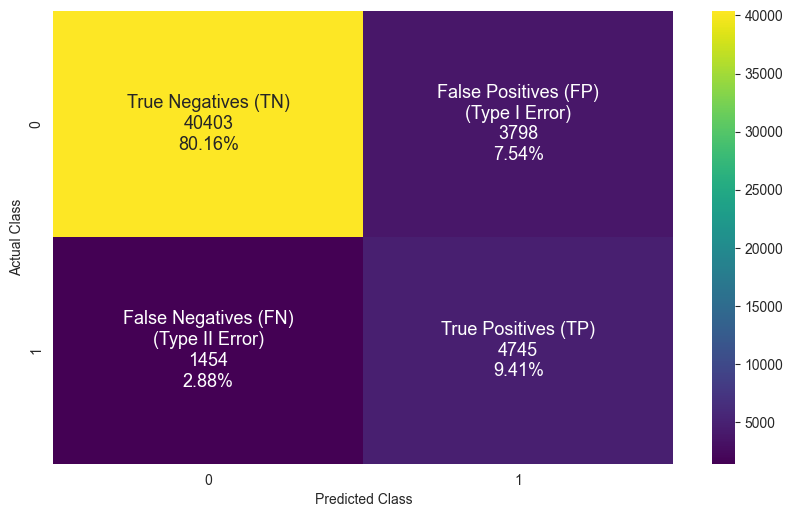

In [968]:
plt.figure(figsize=(10,6))

y_pred = rf_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class')

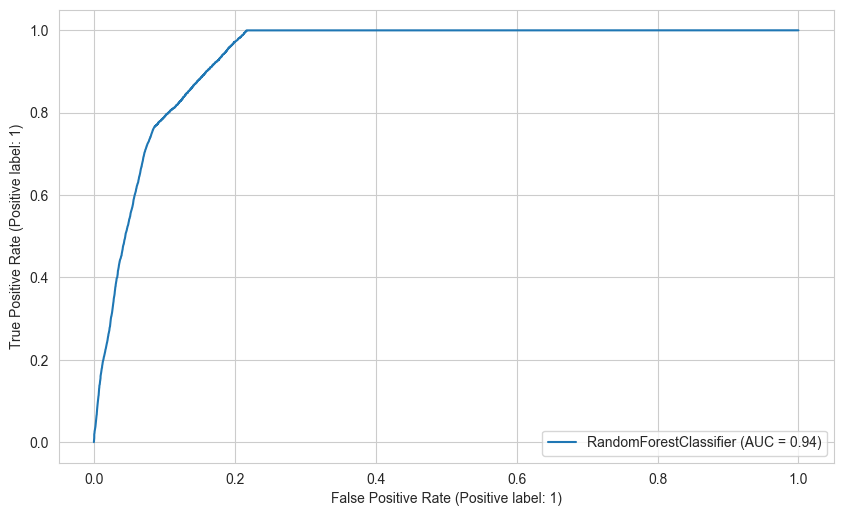

In [969]:
plot_roc_curve(rf_model, X_test, y_test);

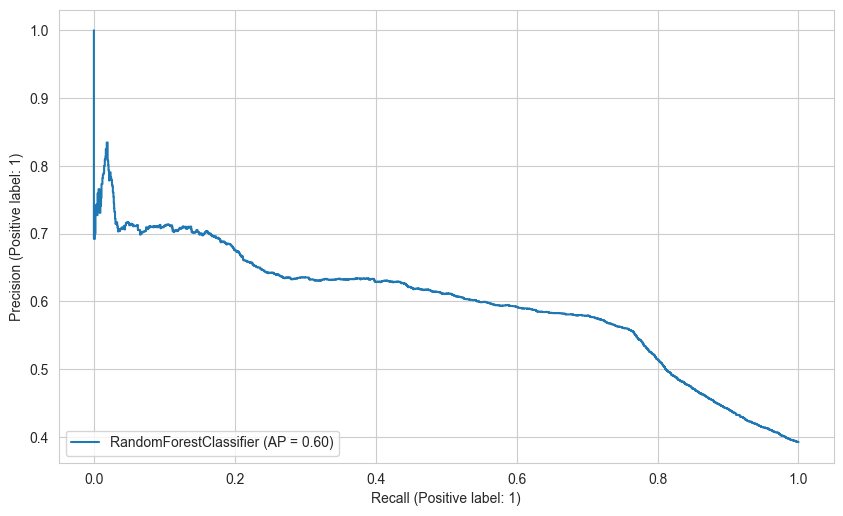

In [970]:
plot_precision_recall_curve(rf_model, X_test, y_test);

## Crossvalidation

In [224]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy    0.897
test_precision   0.558
test_recall      0.765
test_f1          0.646
dtype: float64

### Grid Search

In [95]:
param_grid = {'n_estimators':[50, 100, 300],     #64 ve 128 skorlarina mutlaka bakilmasi gerektigini belirtmistik.
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [96]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "f1", n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [102]:
rf_grid_model.best_params_

{'max_depth': 9,
 'max_features': 4,
 'min_samples_split': 8,
 'n_estimators': 300}

In [97]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[54220 12118]
 [ 3247  6015]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.88     66338
           1       0.33      0.65      0.44      9262

    accuracy                           0.80     75600
   macro avg       0.64      0.73      0.66     75600
weighted avg       0.87      0.80      0.82     75600


Train_Set
[[126972  27694]
 [  6845  14889]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88    154666
           1       0.35      0.69      0.46     21734

    accuracy                           0.80    176400
   macro avg       0.65      0.75      0.67    176400
weighted avg       0.88      0.80      0.83    176400



In [971]:
gr_rf_model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=12, n_estimators= 200, min_samples_split = 3 )
gr_rf_model.fit(X_train,y_train)
eval_metric(gr_rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[39035  5166]
 [ 1577  4622]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     44201
           1       0.47      0.75      0.58      6199

    accuracy                           0.87     50400
   macro avg       0.72      0.81      0.75     50400
weighted avg       0.90      0.87      0.88     50400


Train_Set
[[157235  19568]
 [  4351  20446]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93    176803
           1       0.51      0.82      0.63     24797

    accuracy                           0.88    201600
   macro avg       0.74      0.86      0.78    201600
weighted avg       0.92      0.88      0.89    201600



[Text(0.5, 45.722222222222214, 'Predicted Class'),
 Text(95.72222222222221, 0.5, 'Actual Class')]

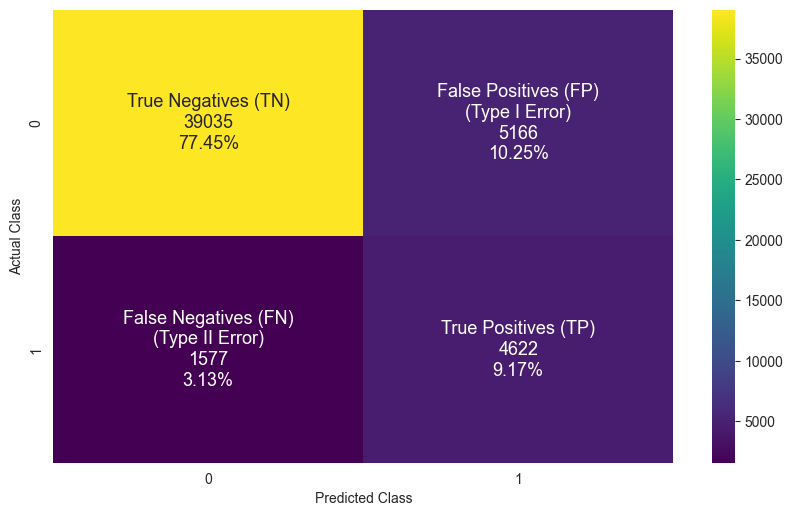

In [972]:
plt.figure(figsize=(10,6))

y_pred = gr_rf_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class')

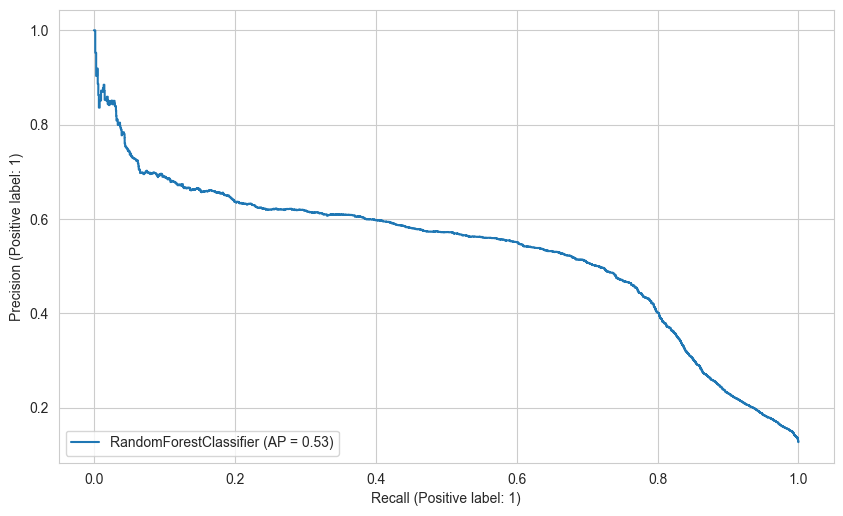

In [356]:
plot_precision_recall_curve(gr_rf_model, X_test, y_test);

## Cross Validation

In [973]:
model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=12, n_estimators= 200, min_samples_split = 3 )

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy    0.870
test_precision   0.482
test_recall      0.747
test_f1          0.586
dtype: float64

## Best Threshold

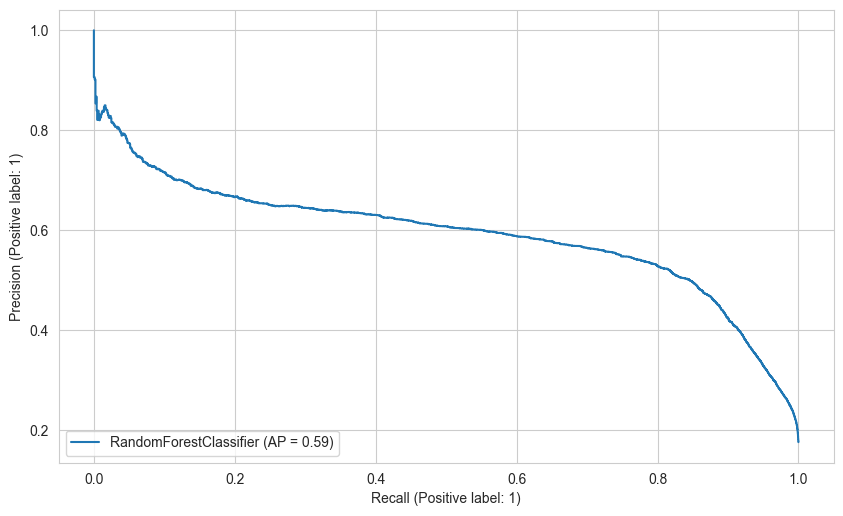

In [358]:
plot_precision_recall_curve(gr_rf_model, X_train, y_train);

In [359]:
y_pred_proba = gr_rf_model.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba[:,1])

0.5916957119949824

In [360]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [361]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5078309408120373

In [365]:
y_pred2 = pd.Series(gr_rf_model.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [366]:
y_trainpred2 = pd.Series(gr_rf_model.predict_proba(X_train)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [363]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[39640  4561]
 [ 1709  4490]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     44201
           1       0.50      0.72      0.59      6199

    accuracy                           0.88     50400
   macro avg       0.73      0.81      0.76     50400
weighted avg       0.90      0.88      0.89     50400



In [367]:
print(classification_report(y_train ,y_trainpred2))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93    176803
           1       0.53      0.80      0.64     24797

    accuracy                           0.89    201600
   macro avg       0.75      0.85      0.79    201600
weighted avg       0.92      0.89      0.90    201600



### Random Forest with Smote

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify=y, random_state = 101)

In [210]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
sm = SMOTE(random_state = 101)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [211]:
sm_rf_model = RandomForestClassifier(random_state=101, max_depth=11, n_estimators= 400)
sm_rf_model.fit(X_res,y_res)
eval_metric(sm_rf_model, X_res, y_res, X_test, y_test)

Test_Set
[[15566  6534]
 [  669  2431]]
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     22100
           1       0.27      0.78      0.40      3100

    accuracy                           0.71     25200
   macro avg       0.61      0.74      0.61     25200
weighted avg       0.87      0.71      0.76     25200


Train_Set
[[141356  57548]
 [ 20997 177907]]
              precision    recall  f1-score   support

           0       0.87      0.71      0.78    198904
           1       0.76      0.89      0.82    198904

    accuracy                           0.80    397808
   macro avg       0.81      0.80      0.80    397808
weighted avg       0.81      0.80      0.80    397808



In [212]:
over = SMOTE(sampling_strategy={1: 70000})
under = RandomUnderSampler(sampling_strategy={0: 150000})

In [213]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [214]:
X_resampled_under, y_resampled_under = under.fit_resample(X_resampled_over, y_resampled_over)

In [215]:
smote_rf_model = RandomForestClassifier(random_state=101, max_depth=17, n_estimators= 200 )
smote_rf_model.fit(X_resampled_under,y_resampled_under)
eval_metric(smote_rf_model, X_resampled_under, y_resampled_under, X_test, y_test)

Test_Set
[[20374  1726]
 [  966  2134]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     22100
           1       0.55      0.69      0.61      3100

    accuracy                           0.89     25200
   macro avg       0.75      0.81      0.78     25200
weighted avg       0.91      0.89      0.90     25200


Train_Set
[[139090  10910]
 [ 13679  56321]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92    150000
           1       0.84      0.80      0.82     70000

    accuracy                           0.89    220000
   macro avg       0.87      0.87      0.87    220000
weighted avg       0.89      0.89      0.89    220000



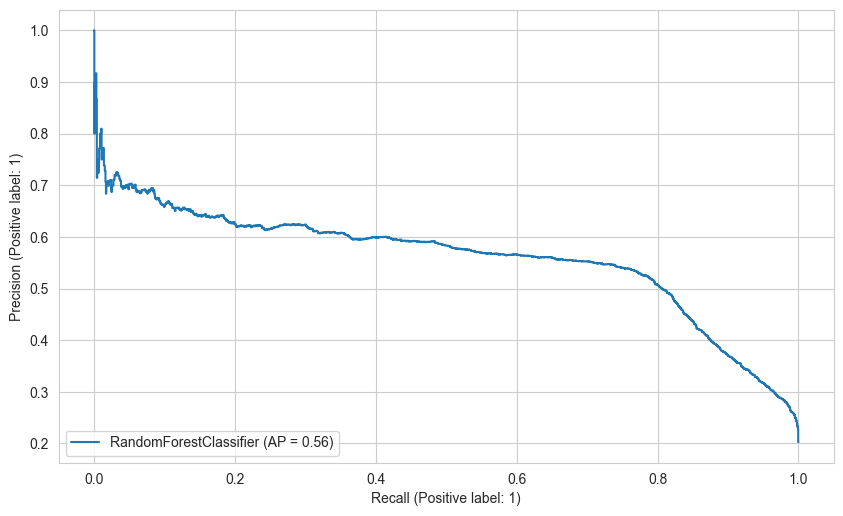

In [216]:
plot_precision_recall_curve(smote_rf_model, X_test, y_test);

Smote bir işe yaramadı :(((

## Random Forest with class weight

In [472]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.57012607, 0.57012607, 0.57012607, ..., 0.57012607, 0.57012607,
       0.57012607])

In [473]:
rf_model = RandomForestClassifier(random_state=101, max_depth=12, n_estimators= 200, min_samples_split = 3)
rf_model.fit(X_train,y_train ,sample_weight=classes_weights)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[39035  5166]
 [ 1577  4622]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     44201
           1       0.47      0.75      0.58      6199

    accuracy                           0.87     50400
   macro avg       0.72      0.81      0.75     50400
weighted avg       0.90      0.87      0.88     50400


Train_Set
[[157235  19568]
 [  4351  20446]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93    176803
           1       0.51      0.82      0.63     24797

    accuracy                           0.88    201600
   macro avg       0.74      0.86      0.78    201600
weighted avg       0.92      0.88      0.89    201600



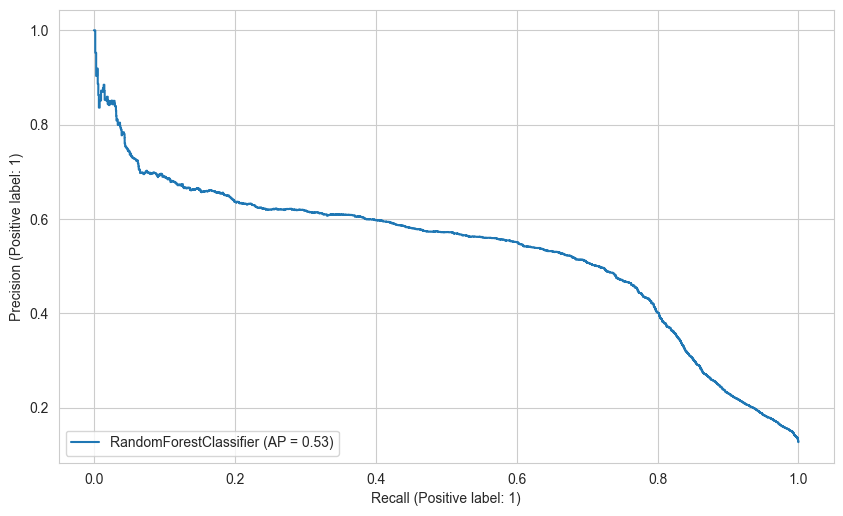

In [474]:
plot_precision_recall_curve(rf_model, X_test, y_test);

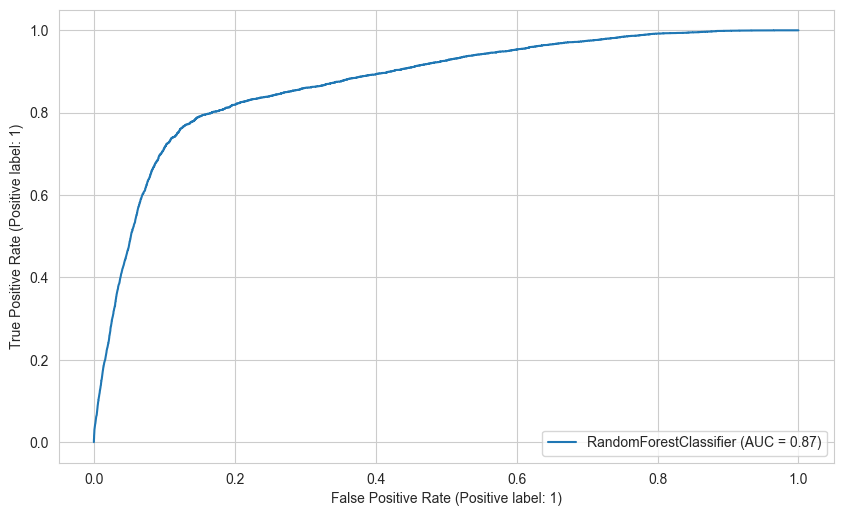

In [475]:
plot_roc_curve(rf_model, X_test, y_test);

## Feature Importance with Random Forest

In [478]:
gr_rf_model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=12, n_estimators= 200, min_samples_split = 3 )
gr_rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_split=3, n_estimators=200, random_state=101)

In [479]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = gr_rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
Income,0.184
CITY,0.160
Age,0.144
Profession,0.138
STATE,0.100
Experience,0.083
CURRENT_JOB_YRS,0.078
CURRENT_HOUSE_YRS,0.060
Car_Ownership,0.020
House_Ownership,0.019


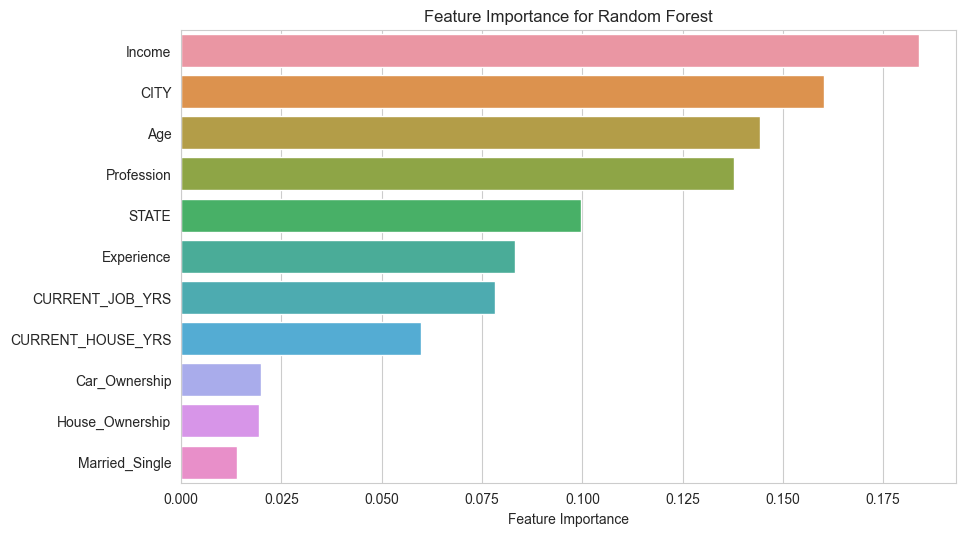

In [480]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance for Random Forest")
plt.show()

## New Predictions Based on features that have importance

In [544]:
new_df = df[["Income", "CITY", "Age", "Profession", "STATE", "Experience", "Risk_Flag"]]

In [545]:
X = new_df.drop('Risk_Flag',axis=1)
y = new_df['Risk_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 101)

In [546]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[40396  3805]
 [ 1452  4747]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     44201
           1       0.56      0.77      0.64      6199

    accuracy                           0.90     50400
   macro avg       0.76      0.84      0.79     50400
weighted avg       0.91      0.90      0.90     50400


Train_Set
[[161815  14988]
 [     5  24792]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    176803
           1       0.62      1.00      0.77     24797

    accuracy                           0.93    201600
   macro avg       0.81      0.96      0.86    201600
weighted avg       0.95      0.93      0.93    201600



In [548]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=13, min_samples_split=4)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[40024  4177]
 [ 1644  4555]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     44201
           1       0.52      0.73      0.61      6199

    accuracy                           0.88     50400
   macro avg       0.74      0.82      0.77     50400
weighted avg       0.91      0.88      0.89     50400


Train_Set
[[160782  16021]
 [  4494  20303]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94    176803
           1       0.56      0.82      0.66     24797

    accuracy                           0.90    201600
   macro avg       0.77      0.86      0.80    201600
weighted avg       0.92      0.90      0.91    201600



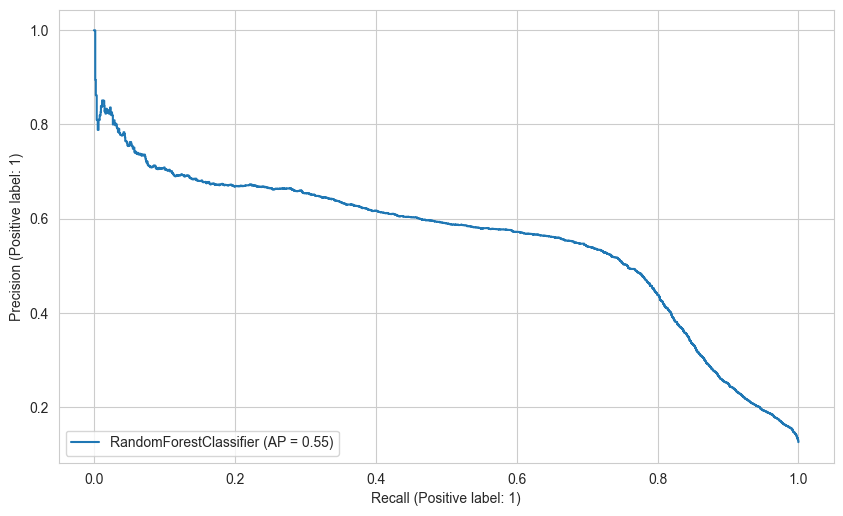

In [549]:
plot_precision_recall_curve(rf_model, X_test, y_test);

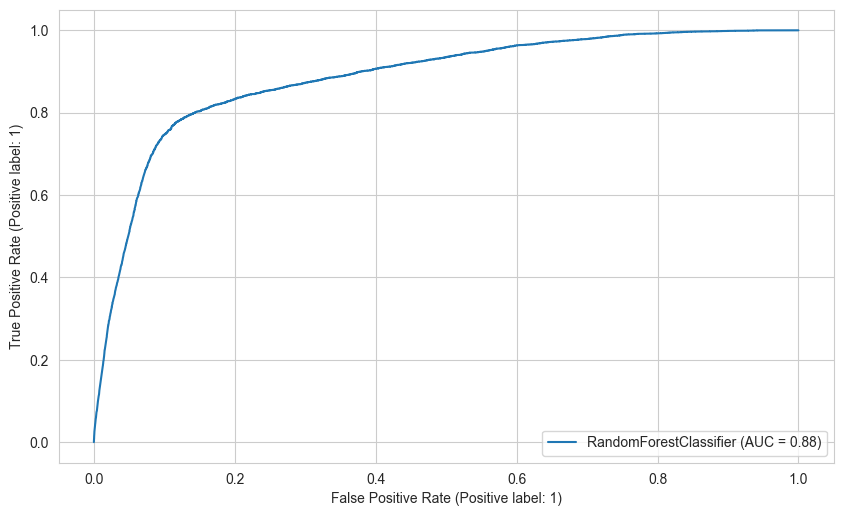

In [550]:
plot_roc_curve(rf_model, X_test, y_test);

# XGBoost

In [516]:
from xgboost import XGBClassifier

In [517]:
X = df.drop('Risk_Flag',axis=1)
y = df['Risk_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 101)

In [146]:
xgb_model = XGBClassifier(random_state=101).fit(X_train, y_train)

[22:02:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [147]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[43743   458]
 [ 5357   842]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     44201
           1       0.65      0.14      0.22      6199

    accuracy                           0.88     50400
   macro avg       0.77      0.56      0.58     50400
weighted avg       0.86      0.88      0.85     50400


Train_Set
[[175375   1428]
 [ 21055   3742]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    176803
           1       0.72      0.15      0.25     24797

    accuracy                           0.89    201600
   macro avg       0.81      0.57      0.59    201600
weighted avg       0.87      0.89      0.85    201600



[Text(0.5, 45.722222222222214, 'Predicted Class'),
 Text(95.72222222222221, 0.5, 'Actual Class')]

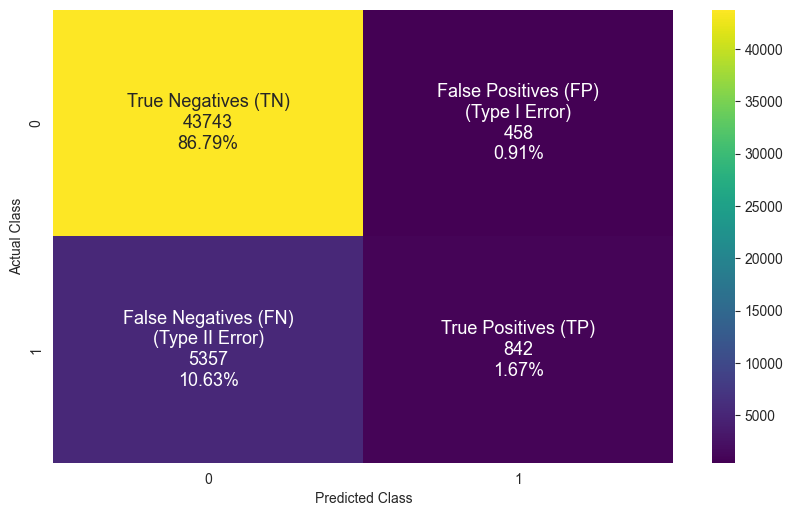

In [148]:
plt.figure(figsize=(10,6))

y_pred = xgb_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class')

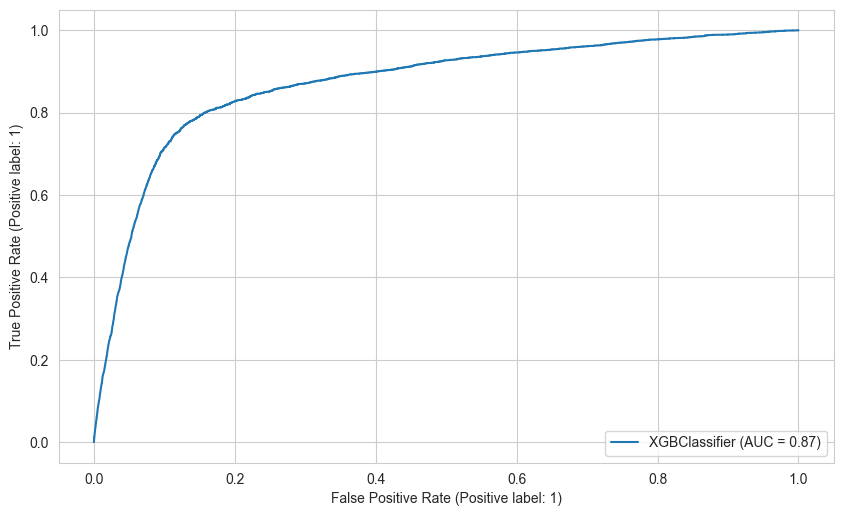

In [144]:
plot_roc_curve(xgb_model, X_test, y_test);

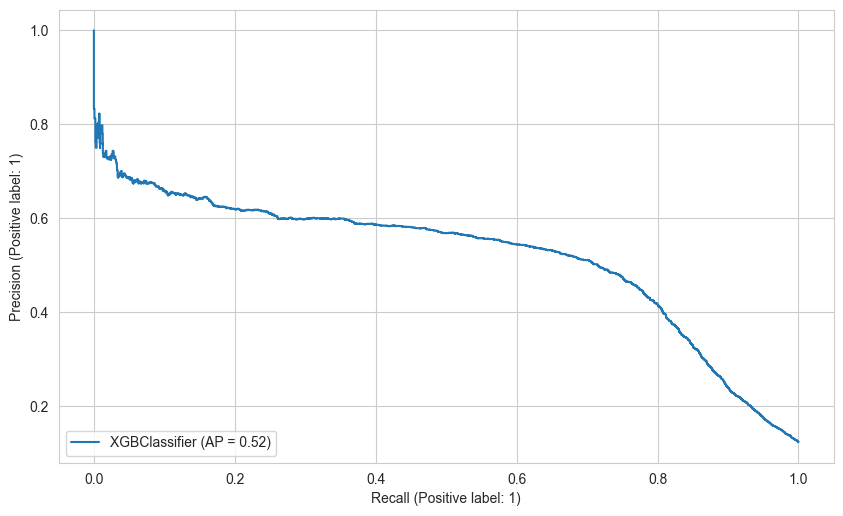

In [145]:
plot_precision_recall_curve(xgb_model, X_test, y_test);

## Grid Search

In [88]:
param_grid = {"n_estimators":[100] , "learning_rate":[0.1], 'max_depth':[3,4,5], "scale_pos_weight":[9,8,7,6],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}
# 'learning_rate': 0.1, 'n_estimators': 100, 'scale_pos_weight': 6}

In [89]:
xgb_model = XGBClassifier(random_state=101)

In [90]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1", n_jobs = -1).fit(X_train, y_train)

[22:15:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [91]:
xgb_grid.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'scale_pos_weight': 6,
 'subsample': 0.5}

In [92]:
xgb_grid.best_score_   

0.45448849096403715

In [93]:
y_pred = xgb_grid.predict(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[57788  8550]
 [ 3912  5350]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90     66338
           1       0.38      0.58      0.46      9262

    accuracy                           0.84     75600
   macro avg       0.66      0.72      0.68     75600
weighted avg       0.87      0.84      0.85     75600


Train_Set
[[135370  19296]
 [  8510  13224]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91    154666
           1       0.41      0.61      0.49     21734

    accuracy                           0.84    176400
   macro avg       0.67      0.74      0.70    176400
weighted avg       0.88      0.84      0.86    176400



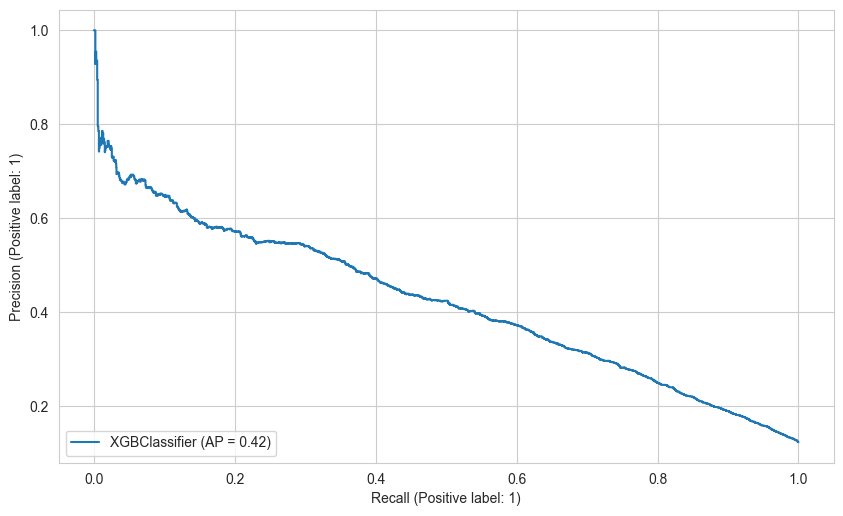

In [520]:
plot_precision_recall_curve(xgb_grid, X_test, y_test);

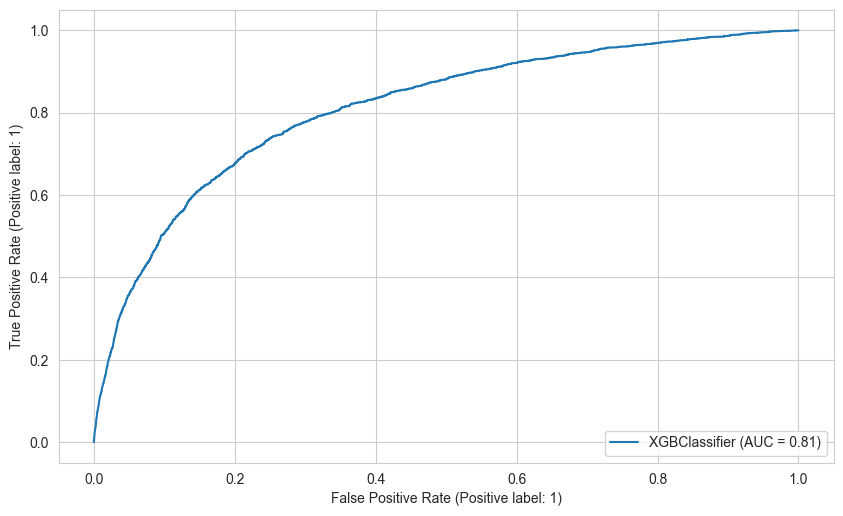

In [519]:
plot_roc_curve(xgb_grid, X_test, y_test);

# Deep Learning (ANN)

In [527]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix   # classification metricleri
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [528]:
X= dummy_df.drop(["Risk_Flag"], axis=1)
y= dummy_df["Risk_Flag"]

In [529]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [530]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [532]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.57012607, 0.57012607, 0.57012607, ..., 0.57012607, 0.57012607,
       0.57012607])

In [536]:
from tensorflow.keras.callbacks import EarlyStopping

In [537]:
early_stop = EarlyStopping(monitor = "val_recall", mode = "max", verbose = 1, patience = 5, restore_best_weights = True)

In [539]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train_scaled.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [541]:
model.fit(x = X_train_scaled, y = y_train, validation_split = 0.1, batch_size = 16, epochs = 100, sample_weight=classes_weights, callbacks = [early_stop], verbose=1)

Epoch 1/100
11340/11340 [==============================] - 27s 2ms/step - loss: 0.6824 - recall: 0.5616 - val_loss: 0.6615 - val_recall: 0.5700
Epoch 2/100
11340/11340 [==============================] - 21s 2ms/step - loss: 0.6607 - recall: 0.5947 - val_loss: 0.6402 - val_recall: 0.5844
Epoch 3/100
11340/11340 [==============================] - 21s 2ms/step - loss: 0.6402 - recall: 0.6341 - val_loss: 0.6297 - val_recall: 0.7062
Epoch 4/100
11340/11340 [==============================] - 21s 2ms/step - loss: 0.6246 - recall: 0.6646 - val_loss: 0.6130 - val_recall: 0.6169
Epoch 5/100
11340/11340 [==============================] - 21s 2ms/step - loss: 0.6117 - recall: 0.6806 - val_loss: 0.6104 - val_recall: 0.7926
Epoch 6/100
11340/11340 [==============================] - 21s 2ms/step - loss: 0.6008 - recall: 0.6968 - val_loss: 0.5973 - val_recall: 0.6486
Epoch 7/100
11340/11340 [==============================] - 21s 2ms/step - loss: 0.5924 - recall: 0.7085 - val_loss: 0.5881 - val_recall:

<AxesSubplot:>

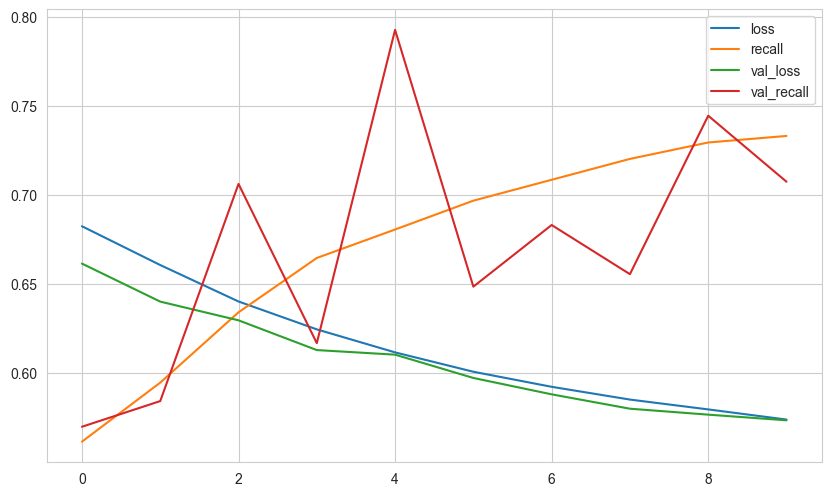

In [542]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [543]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23839 20362]
 [ 1314  4885]]
              precision    recall  f1-score   support

           0       0.95      0.54      0.69     44201
           1       0.19      0.79      0.31      6199

    accuracy                           0.57     50400
   macro avg       0.57      0.66      0.50     50400
weighted avg       0.85      0.57      0.64     50400



# Prediction

## EDA of Test and Train Data

In [987]:
test = pd.read_csv("Test Data.csv")

In [988]:
train = pd.read_csv("Training Data.csv")

In [989]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,28000.000,14000.500,8083.048,1.000,7000.750,14000.500,21000.250,28000.000
Income,28000.000,5029562.654,2864937.667,10310.000,2545414.000,5046744.000,7474639.000,9999814.000
Age,28000.000,50.055,17.130,21.000,35.000,50.000,65.000,79.000
Experience,28000.000,10.120,6.027,0.000,5.000,10.000,15.000,20.000
CURRENT_JOB_YRS,28000.000,6.339,3.645,0.000,3.000,6.000,9.000,14.000
CURRENT_HOUSE_YRS,28000.000,11.992,1.398,10.000,11.000,12.000,13.000,14.000


In [990]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,252000.000,126000.500,72746.278,1.000,63000.750,126000.500,189000.250,252000.000
Income,252000.000,4997116.665,2878311.014,10310.000,2503015.000,5000694.500,7477502.000,9999938.000
Age,252000.000,49.954,17.064,21.000,35.000,50.000,65.000,79.000
Experience,252000.000,10.084,6.003,0.000,5.000,10.000,15.000,20.000
CURRENT_JOB_YRS,252000.000,6.334,3.647,0.000,3.000,6.000,9.000,14.000
CURRENT_HOUSE_YRS,252000.000,11.998,1.399,10.000,11.000,12.000,13.000,14.000
Risk_Flag,252000.000,0.123,0.328,0.000,0.000,0.000,0.000,1.000


In [991]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 28000 non-null  int64 
 1   Income             28000 non-null  int64 
 2   Age                28000 non-null  int64 
 3   Experience         28000 non-null  int64 
 4   Married/Single     28000 non-null  object
 5   House_Ownership    28000 non-null  object
 6   Car_Ownership      28000 non-null  object
 7   Profession         28000 non-null  object
 8   CITY               28000 non-null  object
 9   STATE              28000 non-null  object
 10  CURRENT_JOB_YRS    28000 non-null  int64 
 11  CURRENT_HOUSE_YRS  28000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.6+ MB


In [992]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


## Data Cleaning

### City column

In [993]:
train.CITY.sort_values().unique() == test.CITY.sort_values().unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [994]:
test.CITY.sort_values().unique()[list]

array(['Bhalswa Jahangir Pur', 'Bihar Sharif', 'Karawal Nagar',
       'Khora, Ghaziabad', 'Kirari Suleman Nagar', 'Nangloi Jat',
       'Navi Mumbai', 'New Delhi', 'North Dumdum', 'Rajpur Sonarpur',
       'Raurkela Industrial Township', 'Sangli-Miraj & Kupwad',
       'South Dumdum', 'Sri Ganganagar', 'Sultan Pur Majra',
       'Surendranagar Dudhrej'], dtype=object)

In [995]:
train.CITY.sort_values().unique()[list]

array(['Bhalswa_Jahangir_Pur', 'Bihar_Sharif', 'Karawal_Nagar',
       'Khora,_Ghaziabad', 'Kirari_Suleman_Nagar', 'Nangloi_Jat',
       'Navi_Mumbai', 'New_Delhi', 'North_Dumdum', 'Rajpur_Sonarpur',
       'Raurkela_Industrial_Township', 'Sangli-Miraj_&_Kupwad',
       'South_Dumdum', 'Sri_Ganganagar', 'Sultan_Pur_Majra',
       'Surendranagar_Dudhrej'], dtype=object)

In [996]:
test.CITY = test.CITY.apply(lambda x: x.replace(" ","_")) 

In [997]:
train.CITY.sort_values().unique() == test.CITY.sort_values().unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

#### Profession column

In [998]:
train.Profession.sort_values().unique() == test.Profession.sort_values().unique()

array([False,  True,  True, False,  True,  True, False, False,  True,
       False, False, False,  True, False, False,  True,  True, False,
        True,  True,  True,  True, False, False,  True, False,  True,
       False, False, False,  True,  True,  True, False,  True,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True, False, False])

In [999]:
train.Profession.sort_values().unique()

array(['Air_traffic_controller', 'Analyst', 'Architect', 'Army_officer',
       'Artist', 'Aviator', 'Biomedical_Engineer', 'Chartered_Accountant',
       'Chef', 'Chemical_engineer', 'Civil_engineer', 'Civil_servant',
       'Comedian', 'Computer_hardware_engineer', 'Computer_operator',
       'Consultant', 'Dentist', 'Design_Engineer', 'Designer', 'Drafter',
       'Economist', 'Engineer', 'Fashion_Designer', 'Financial_Analyst',
       'Firefighter', 'Flight_attendant', 'Geologist', 'Graphic_Designer',
       'Hotel_Manager', 'Industrial_Engineer', 'Lawyer', 'Librarian',
       'Magistrate', 'Mechanical_engineer', 'Microbiologist', 'Official',
       'Petroleum_Engineer', 'Physician', 'Police_officer', 'Politician',
       'Psychologist', 'Scientist', 'Secretary', 'Software_Developer',
       'Statistician', 'Surgeon', 'Surveyor', 'Technical_writer',
       'Technician', 'Technology_specialist', 'Web_designer'],
      dtype=object)

In [1000]:
test.Profession.sort_values().unique()

array(['Air traffic controller', 'Analyst', 'Architect', 'Army officer',
       'Artist', 'Aviator', 'Biomedical Engineer', 'Chartered Accountant',
       'Chef', 'Chemical engineer', 'Civil engineer', 'Civil servant',
       'Comedian', 'Computer hardware engineer', 'Computer operator',
       'Consultant', 'Dentist', 'Design Engineer', 'Designer', 'Drafter',
       'Economist', 'Engineer', 'Fashion Designer', 'Financial Analyst',
       'Firefighter', 'Flight attendant', 'Geologist', 'Graphic Designer',
       'Hotel Manager', 'Industrial Engineer', 'Lawyer', 'Librarian',
       'Magistrate', 'Mechanical engineer', 'Microbiologist', 'Official',
       'Petroleum Engineer', 'Physician', 'Police officer', 'Politician',
       'Psychologist', 'Scientist', 'Secretary', 'Software Developer',
       'Statistician', 'Surgeon', 'Surveyor', 'Technical writer',
       'Technician', 'Technology specialist', 'Web designer'],
      dtype=object)

In [1001]:
test.Profession = test.Profession.apply(lambda x: x.replace(" ","_")) 

In [1002]:
train.Profession.sort_values().unique() == test.Profession.sort_values().unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

### State Column

In [1003]:
train.STATE.sort_values().unique() == test.STATE.sort_values().unique()

array([False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True, False])

In [1004]:
test.STATE = test.STATE.apply(lambda x: x.replace(" ","_")) 

In [1005]:
train.STATE.sort_values().unique() == test.STATE.sort_values().unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [1006]:
test["STATE"] = test["STATE"].apply(lambda x: "Uttar_Pradesh" if x == "Uttar_Pradesh[5]" else x)

In [1007]:
train["STATE"] = train["STATE"].apply(lambda x: "Uttar_Pradesh" if x == "Uttar_Pradesh[5]" else x)

## Final Model

In [1008]:
final_train = train[["Income", "CITY", "Age", "Profession", "STATE", "Experience", "Risk_Flag"]]
final_test = test[["Income", "CITY", "Age", "Profession", "STATE", "Experience"]]

In [1009]:
from sklearn.preprocessing import OrdinalEncoder

In [1010]:
cat = final_train.select_dtypes("object").columns
cat

Index(['CITY', 'Profession', 'STATE'], dtype='object')

In [1011]:
enc = OrdinalEncoder()
final_train[cat] = enc.fit_transform(final_train[cat])
final_test[cat] =enc.transform(final_test[cat])

In [1012]:
final_train.head()

,Income,CITY,Age,Profession,STATE,Experience,Risk_Flag
0,1303834,251.000,23,33.000,13.000,3,0
1,7574516,227.000,40,43.000,14.000,10,0
2,3991815,8.000,66,47.000,12.000,4,0
3,6256451,54.000,41,43.000,17.000,2,1
4,5768871,296.000,47,11.000,22.000,11,1


In [1013]:
final_test.head()

,Income,CITY,Age,Profession,STATE,Experience
0,7393090,181.000,59,26.000,27.000,19
1,1215004,131.000,25,24.000,14.000,5
2,8901342,290.000,50,30.000,14.000,12
3,1944421,171.000,49,1.000,14.000,9
4,13429,39.000,25,12.000,27.000,18


In [1014]:
X = final_train.drop('Risk_Flag',axis=1)
y = final_train['Risk_Flag']

In [1015]:
final_model = RandomForestClassifier(class_weight="balanced", random_state=101, max_depth=13, min_samples_split=4)
final_model.fit(X,y)

RandomForestClassifier(class_weight='balanced', max_depth=13,
                       min_samples_split=4, random_state=101)

In [1016]:
final_pred = final_model.predict(final_test)

In [1017]:
predictions = pd.DataFrame(final_pred)

In [1018]:
final = pd.concat([test, predictions], axis=1)
final

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,0
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West_Bengal,4,13,0
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10,0
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14,0
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12,0
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West_Bengal,13,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra_Pradesh,5,10,0
27996,27997,2917765,47,9,single,rented,no,Technical_writer,Ratlam,Madhya_Pradesh,9,14,0
27997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13,0
27998,27999,9474180,51,13,single,rented,yes,Chartered_Accountant,Bhilai,Chhattisgarh,13,14,0


In [1019]:
final.rename(columns = {0:'Risk_Flag'}, inplace=True)
final

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West_Bengal,4,13,0
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10,0
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14,0
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12,0
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West_Bengal,13,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra_Pradesh,5,10,0
27996,27997,2917765,47,9,single,rented,no,Technical_writer,Ratlam,Madhya_Pradesh,9,14,0
27997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13,0
27998,27999,9474180,51,13,single,rented,yes,Chartered_Accountant,Bhilai,Chhattisgarh,13,14,0


In [349]:
final.to_csv("final.csv", index = False )

### _The End_